(rasch-implementation-notebook)=
# Implementazione 

In [1]:
source("../_common.R")

suppressPackageStartupMessages({
    library("tidyverse")
    library("eRm")
    library("mirt")
    library("grid")
    library("TAM")
    # devtools::install_github("masurp/ggmirt")
    library("ggmirt")
    library("psychotools")
    library("latex2exp")
    })

Il set di dati `data.fims.Aus.Jpn.scored` contiene le risposte valutate per un sottoinsieme di item da parte di studenti australiani e giapponesi nello studio "First International Mathematics Study" (FIMS, Husén, 1967).

In [2]:
data(data.fims.Aus.Jpn.scored, package = "TAM")
fims <- data.fims.Aus.Jpn.scored

In [3]:
glimpse(fims)

Rows: 6,371
Columns: 16
$ SEX     <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ M1PTI1  <dbl> 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,…
$ M1PTI2  <dbl> 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,…
$ M1PTI3  <dbl> 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,…
$ M1PTI6  <dbl> 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,…
$ M1PTI7  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ M1PTI11 <dbl> 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,…
$ M1PTI12 <dbl> 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ M1PTI14 <dbl> 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,…
$ M1PTI17 <dbl> 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,…
$ M1PTI18 <dbl> 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,…
$ M1PTI19 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ M1PTI21 <dbl> 

Oltre alle risposte sui 14 item di matematica, il data set contiene anche informazioni sul genere del partecipate e sul paese d'origine.

In [4]:
fims$SEX <- as.factor(fims$SEX)
levels(fims$SEX) <- c("male", "female")
fims$country <- as.factor(fims$country)
levels(fims$country) <- c("Australia", "Japan")

In [5]:
summary(fims[, c("SEX", "country")])

     SEX            country    
 male  :3319   Australia:4320  
 female:3052   Japan    :2051  

Seguiamo il tutorial di {cite:t}`debelak2022introduction` e esaminiamo le risposte dei primi 400 partecipanti. Con le seguenti istruzioni, per facilitare la manipolazione dei dati, cambiamo il nome delle colonne.

In [6]:
responses <- fims[1:400, 2:15]
colnames(responses) <- gsub("M1PTI", "I", colnames(responses))
glimpse(responses)

Rows: 400
Columns: 14
$ I1  <dbl> 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, …
$ I2  <dbl> 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, …
$ I3  <dbl> 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, …
$ I6  <dbl> 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, …
$ I7  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ I11 <dbl> 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, …
$ I12 <dbl> 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ I14 <dbl> 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, …
$ I17 <dbl> 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, …
$ I18 <dbl> 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, …
$ I19 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ I21 <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, …
$ I22 <dbl> 0, 0, 

In [7]:
gender <- as.factor(fims$SEX[1:400])
levels(gender) <- c("male", "female")

Un'analisi IRT può essere paragonata a un'analisi fattoriale. Dopo avere adattato il modello di Rasch ai dati usando `mirt()`, possiamo usare la funzione `summary()` per ottenere quella che viene definita "soluzione fattoriale", che include i carichi fattoriali (F1) e le comunalità (h2). Le comunalità, essendo carichi fattoriali al quadrato, sono interpretate come la varianza spiegata in un item dal tratto latente. Nel caso presente, tutti gli item hanno una relazione sostanziale (saturazioni $\approx$ .50) con il tratto latente, indicando che il tratto latente è un buon indicatore della varianza osservata in quegli item. Questo suggerisce che il tratto latente è in grado di spiegare una porzione almento moderata della varianza nei punteggi degli item.

In [8]:
mirt_rm <- mirt(responses, 1, itemtype = "Rasch", verbose = FALSE)
summary(mirt_rm)

       F1    h2
I1  0.488 0.238
I2  0.488 0.238
I3  0.488 0.238
I6  0.488 0.238
I7  0.488 0.238
I11 0.488 0.238
I12 0.488 0.238
I14 0.488 0.238
I17 0.488 0.238
I18 0.488 0.238
I19 0.488 0.238
I21 0.488 0.238
I22 0.488 0.238
I23 0.488 0.238

SS loadings:  3.33 
Proportion Var:  0.238 

Factor correlations: 

   F1
F1  1


Nell'IRT, tuttavia, siamo generalmente più interessati ai parametri specifici IRT (discriminazione e difficoltà). Questi parametri possono essere estratti dall’oggetto creato da mirt() nel seguente modo:

In [9]:
params_rm <- coef(mirt_rm, IRTpars = TRUE, simplify = TRUE)
round(params_rm$items, 2) # g = c = guessing parameter

,a,b,g,u
I1,1,-1.10,0,1
I2,1,-1.25,0,1
I3,1,-2.04,0,1
I6,1,-0.05,0,1
I7,1,2.53,0,1
I11,1,-1.25,0,1
I12,1,0.81,0,1
I14,1,-0.50,0,1
I17,1,1.33,0,1
I18,1,-0.40,0,1


- $a$ (Discriminazione): Il parametro $a$ (discriminazione) rappresenta la pendenza delle curve caratteristiche degli item (ICC - Item Characteristic Curves). Una pendenza elevata (valore alto di $a$) indica che l'item è molto efficace nel distinguere tra individui con livelli diversi del tratto latente (ad esempio, abilità). Questo significa che piccole variazioni nel tratto latente portano a grandi cambiamenti nella probabilità di rispondere correttamente all'item. Una pendenza bassa (valore basso di $a$) suggerisce che l’item non è altrettanto efficace nel discriminare tra livelli diversi del tratto latente. In questo caso, anche ampie variazioni nel tratto latente comportano solo piccoli cambiamenti nella probabilità di risposta corretta. Nel modello di Rasch si assume che tutti gli item abbiano la stessa pendenza (o potere discriminante), e quindi tutti i valori di 
$a$ sono fissati allo stesso valore (ovvero 1).
- $b$ (Difficoltà): Rappresenta il livello di abilità a cui un rispondente ha il 50% di probabilità di rispondere correttamente all'item. Un valore positivo indica un item più difficile (richiede un livello di abilità superiore per rispondere correttamente), mentre un valore negativo indica un item più facile. Ad esempio, I7 ha un valore di difficoltà di 2.53, il che significa che è relativamente difficile, mentre I3, con un valore di -2.04, è relativamente facile.
- $g$ (Probabilità di Indovinare): In questo modello, la probabilità di indovinare è impostata a zero per tutti gli item, il che è coerente con il modello di Rasch, dove non si considera la possibilità di indovinare correttamente un item per caso.

Adattiamo ora ai dati il modello di Rasch con la funzione `eRm::RM()`

In [10]:
rm_sum0 <- eRm::RM(responses)

In [11]:
summary(rm_sum0)


Results of RM estimation: 

Call:  eRm::RM(X = responses) 

Conditional log-likelihood: -1886.529 
Number of iterations: 23 
Number of parameters: 13 

Item (Category) Difficulty Parameters (eta): with 0.95 CI:
    Estimate Std. Error lower CI upper CI
I2    -1.420      0.121   -1.658   -1.183
I3    -2.210      0.145   -2.494   -1.926
I6    -0.215      0.108   -0.426   -0.004
I7     2.364      0.170    2.031    2.697
I11   -1.420      0.121   -1.658   -1.183
I12    0.642      0.113    0.422    0.863
I14   -0.663      0.110   -0.879   -0.448
I17    1.152      0.122    0.913    1.391
I18   -0.565      0.109   -0.778   -0.351
I19    1.889      0.146    1.602    2.175
I21    1.578      0.134    1.315    1.841
I22    2.244      0.163    1.925    2.564
I23   -2.103      0.141   -2.379   -1.827

Item Easiness Parameters (beta) with 0.95 CI:
         Estimate Std. Error lower CI upper CI
beta I1     1.273      0.118    1.041    1.504
beta I2     1.420      0.121    1.183    1.658
beta I3     

La funzione `RM()` impone un vincolo sulle stime dei parametri di difficoltà degli item. Questo vincolo è che la media di questi parametri (beta) sia zero. Questo approccio è noto come "parametrizzazione ancorata" o "centrata". Il vantaggio di questa parametrizzazione è che posiziona la scala di difficoltà degli item in un punto di riferimento fisso, facilitando il confronto tra diversi set di item o tra diverse applicazioni dello stesso test.

Verifichiamo.

In [12]:
coef(rm_sum0) |> print()

   beta I1    beta I2    beta I3    beta I6    beta I7   beta I11   beta I12 
 1.2725717  1.4203230  2.2098398  0.2153106 -2.3639411  1.4203230 -0.6423859 
  beta I14   beta I17   beta I18   beta I19   beta I21   beta I22   beta I23 
 0.6632561 -1.1517115  0.5646248 -1.8886152 -1.5781132 -2.2444186  2.1029365 


In [13]:
sum(rm_sum0$betapar)

[1] 8.881784e-16

Nella parametrizzazione utilizzata da `mirt()`, i parametri di difficoltà vengono invece stimati senza un vincolo sulla loro media. Questo può portare a stime dei parametri di difficoltà che differiscono da quelle ottenute tramite `RM()`. Questa libertà nella stima dei parametri permette una flessibilità maggiore, specialmente in modelli IRT complessi o multidimensionali, ma può rendere più complesso il confronto diretto tra set di item o test differenti.

Dalla soluzione prodotta da `eRm::RM()` possiamo estrarre le stime sia nei termini della facilità che della difficoltà degli item.

In [14]:
tab <- data.frame(
    item_score = colSums(responses),
    easiness = coef(rm_sum0),
    difficulty = -coef(rm_sum0)
)
tab[order(tab$item_score), ]

,item_score,easiness,difficulty
,<dbl>,<dbl>,<dbl>
I7,40,-2.3639411,2.3639411
I22,44,-2.2444186,2.2444186
I19,58,-1.8886152,1.8886152
I21,73,-1.5781132,1.5781132
I17,98,-1.1517115,1.1517115
I12,134,-0.6423859,0.6423859
I6,204,0.2153106,-0.2153106
I18,233,0.5646248,-0.5646248
I14,241,0.6632561,-0.6632561


In alterativa, possiamo usare il pacchetto `TAM`. Come nel caso di `mirt`, anche in questo caso viene usata una procedura di stima di massima verosimiglianza marginale. 

In [15]:
tam_rm <- tam.mml(responses)

....................................................
Processing Data      2024-02-16 07:55:13.732814 


    * Response Data: 400 Persons and  14 Items 


    * Numerical integration with 21 nodes
    * Created Design Matrices   ( 2024-02-16 07:55:13.735369 )


    * Calculated Sufficient Statistics   ( 2024-02-16 07:55:13.738355 )


....................................................
Iteration 1     2024-02-16 07:55:13.741022
E Step


M Step Intercepts   |

-

-

-

-


  Deviance = 5667.9246
  Maximum item intercept parameter change: 0.314748
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0.123048


....................................................
Iteration 2     2024-02-16 07:55:13.746405
E Step


M Step Intercepts   |

-

-


  Deviance = 5633.0417 | Absolute change: 34.8829 | Relative change: 0.00619256
  Maximum item intercept parameter change: 0.003284
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0.007956


....................................................
Iteration 3     2024-02-16 07:55:13.748961
E Step


M Step Intercepts   |

-

-


  Deviance = 5633.0057 | Absolute change: 0.036 | Relative change: 6.39e-06
  Maximum item intercept parameter change: 0.002198
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0.005837


....................................................
Iteration 4     2024-02-16 07:55:13.75166
E Step


M Step Intercepts   |

-

-


  Deviance = 5632.9887 | Absolute change: 0.017 | Relative change: 3.02e-06
  Maximum item intercept parameter change: 0.00151
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0.004059


....................................................
Iteration 5     2024-02-16 07:55:13.75424
E Step


M Step Intercepts   |

-

-


  Deviance = 5632.9805 | Absolute change: 0.0081 | Relative change: 1.44e-06
  Maximum item intercept parameter change: 0.001036
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0.002812


....................................................
Iteration 6     2024-02-16 07:55:13.756791
E Step


M Step Intercepts   |

-

-


  Deviance = 5632.9767 | Absolute change: 0.0039 | Relative change: 6.8e-07
  Maximum item intercept parameter change: 0.00071
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0.001944


....................................................
Iteration 7     2024-02-16 07:55:13.759346
E Step


M Step Intercepts   |

-

-


  Deviance = 5632.9749 | Absolute change: 0.0018 | Relative change: 3.2e-07
  Maximum item intercept parameter change: 0.000486
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0.001342


....................................................
Iteration 8     2024-02-16 07:55:13.762212
E Step


M Step Intercepts   |

-

-


  Deviance = 5632.974 | Absolute change: 9e-04 | Relative change: 1.5e-07
  Maximum item intercept parameter change: 0.000333
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0.000925


....................................................
Iteration 9     2024-02-16 07:55:13.764951
E Step


M Step Intercepts   |

-

-


  Deviance = 5632.9736 | Absolute change: 4e-04 | Relative change: 7e-08
  Maximum item intercept parameter change: 0.000228
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0.000637


....................................................
Iteration 10     2024-02-16 07:55:13.767686
E Step


M Step Intercepts   |

-

-


  Deviance = 5632.9734 | Absolute change: 2e-04 | Relative change: 3e-08
  Maximum item intercept parameter change: 0.000156
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0.000439


....................................................
Iteration 11     2024-02-16 07:55:13.77034
E Step


M Step Intercepts   |

-

-


  Deviance = 5632.9733 | Absolute change: 1e-04 | Relative change: 2e-08
  Maximum item intercept parameter change: 0.000107
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0.000302


....................................................
Iteration 12     2024-02-16 07:55:13.773003
E Step


M Step Intercepts   |

-


  Deviance = 5632.9733 | Absolute change: 0 | Relative change: 1e-08
  Maximum item intercept parameter change: 7.3e-05
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0.000208


....................................................
Iteration 13     2024-02-16 07:55:13.775139
E Step


M Step Intercepts   |

-


  Deviance = 5632.9732 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 5e-05
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0.000143


....................................................
Iteration 14     2024-02-16 07:55:13.777285
E Step


M Step Intercepts   |

-


  Deviance = 5632.9732 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 3.4e-05
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 9.8e-05


....................................................
Item Parameters
   xsi.index xsi.label     est
1          1        I1 -1.1029
2          2        I2 -1.2505
3          3        I3 -2.0422
4          4        I6 -0.0480
5          5        I7  2.5312
6          6       I11 -1.2505
7          7       I12  0.8132
8          8       I14 -0.4952
9          9       I17  1.3263
10        10       I18 -0.3969
11        11       I19  2.0639
12        12       I21  1.7545
13        13       I22  2.4145
14        14       I23 -1.9345
...................................
Regression Coefficients
     [,1]
[1,]    0

Variance:
       [,1]
[1,] 0.9037


EAP Reliability:
[1] 0.656

-----------------------------
Start:  2024-02-16 07:55:13.731477
End:  2024-02-16 07:55:13.783625 
Time difference of 0.05214787 secs



Possiamo ispezionare le stime dei parametri con

In [16]:
tam_rm$item

,item,N,M,xsi.item,AXsi_.Cat1,B.Cat1.Dim1
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
I1,I1,400,0.7175,-1.10292502,-1.10292502,1
I2,I2,400,0.7425,-1.25047869,-1.25047869,1
I3,I3,400,0.8525,-2.04219530,-2.04219530,1
I6,I6,400,0.5100,-0.04803217,-0.04803217,1
I7,I7,400,0.1000,2.53122857,2.53122857,1
I11,I11,400,0.7425,-1.25047869,-1.25047869,1
I12,I12,400,0.3350,0.81318838,0.81318838,1
I14,I14,400,0.6025,-0.49523230,-0.49523230,1
I17,I17,400,0.2450,1.32631928,1.32631928,1


Le colonne di questo output possono essere interpretate come segue:
- `item` indica il nome dell'item.
- `N` indica il numero di candidati che hanno risposto a ciascun item. In questo caso, tutti i 400 candidati hanno risposto a ogni item.
- `M` è la media delle risposte a ciascun item. Nel caso di un item con una media alta ciò significa che a tale item è stata fornita uba risposta corretta da una alta percentuale di candidati.
- `xsi.item` per il modello di Rasch è il parametro di difficoltà dell'item. Gli item con valori alti tendono ad essere più difficili. 
- `AXsi.Cat1` ripete la difficoltà dell'item per il modello di Rasch, ma permetterebbe l'inclusione di una matrice di design A, che non abbiamo usato qui. Per i modelli politomici, l'output includerà parametri dell'item per più di una categoria.
- `B.Cat1.Dim1` è il parametro di discriminazione o pendenza dell'item. Per il modello di Rasch, la pendenza è 1 per ogni item.

Possiamo mostrare solo la difficoltà e l'errore standard con:

In [17]:
tam_rm$xsi

,xsi,se.xsi
,<dbl>,<dbl>
I1,-1.10292502,0.1199213
I2,-1.25047869,0.1231185
I3,-2.04219530,0.1490275
I6,-0.04803217,0.1091832
I7,2.53122857,0.1742477
I11,-1.25047869,0.1231185
I12,0.81318838,0.1149197
I14,-0.49523230,0.1112816
I17,1.32631928,0.1249697


La parametrizzazione classica IRT si ottiene con:

In [18]:
tam_rm$item_irt

item,alpha,beta
<chr>,<dbl>,<dbl>
I1,1,-1.10292502
I2,1,-1.25047869
I3,1,-2.04219530
I6,1,-0.04803217
I7,1,2.53122857
I11,1,-1.25047869
I12,1,0.81318838
I14,1,-0.49523230
I17,1,1.32631928


## Valutazione del Test

Il primo strumento per la valutazione dei test che vorremmo presentare sono i metodi grafici. Il primo di questi, la mappa persona-item, mostra se il campione di persone copre l'intera gamma degli item e viceversa. Il secondo approccio, che consiste nel confrontare le ICC (Curve Caratteristiche dell'Item) teoriche ed empiriche, può aiutare a rilevare gli item che non si adattano bene. Il terzo, il test grafico, è un test visivo per il Funzionamento Differenziale degli Item (DIF).

### Mappa Persona-Item

Abbiamo in precedenza che il modello di Rasch posiziona persone e item sulla stessa scala latente e che l'accuratezza delle stime dei parametri dipende dalla posizione delle persone rispetto agli item. La mappa persona-item è una rappresentazione visiva delle posizioni degli item e delle persone sul continuum latente. Per poter stimare con precisione i parametri degli item a partire dal campione delle persone e viceversa, le difficoltà degli item dovrebbero coprire l'intera gamma delle abilità delle persone e viceversa.

La mappa persona-item (*person−item map*) si ottiene nel modo seguente con `eRm`.

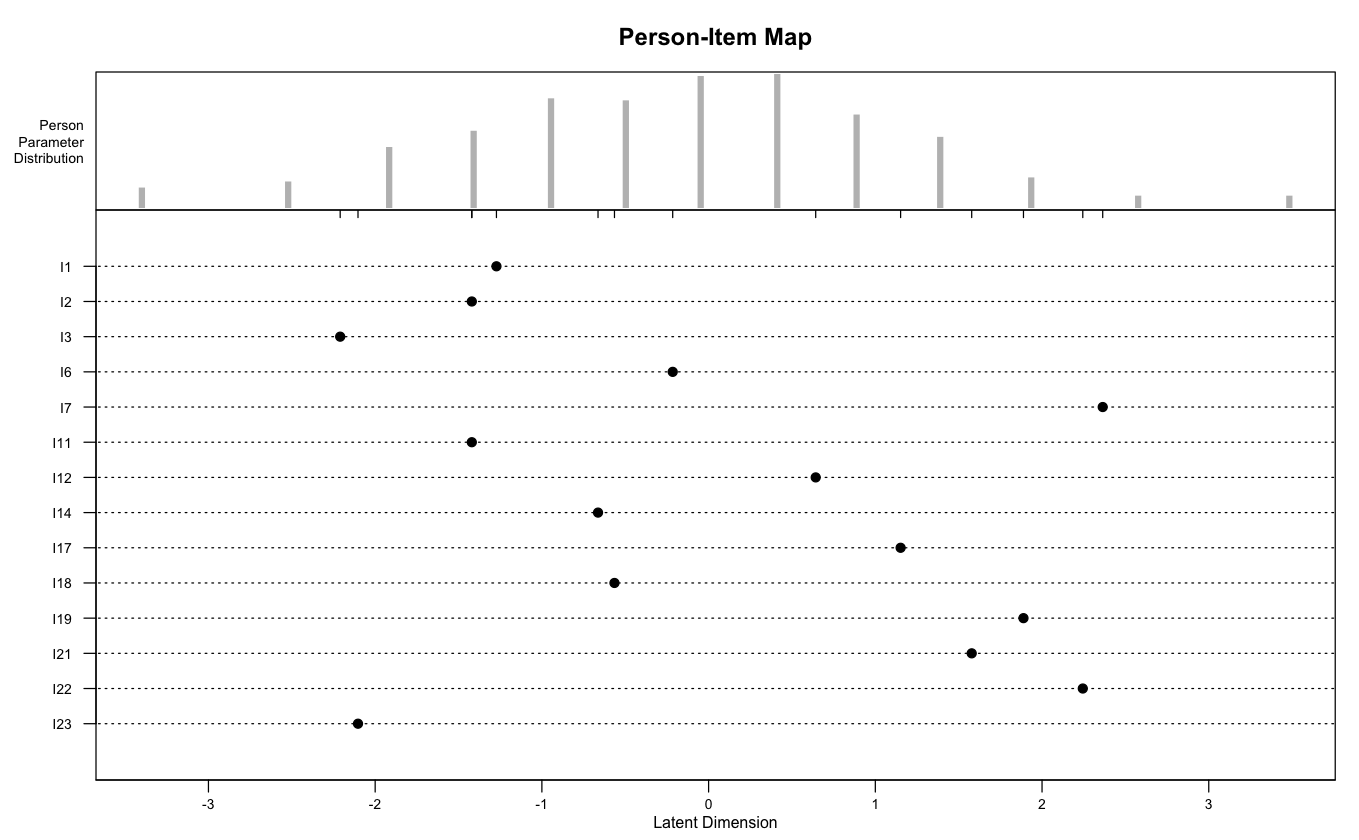

In [19]:
plotPImap(rm_sum0)

La parte superiore della mappa persona-item mostra un istogramma delle stime dei parametri di abilità, mentre la parte inferiore mostra le stime delle difficoltà per ciascun item del test. Per ogni item, la stima della difficoltà è indicata dalla posizione del punto sulla linea tratteggiata corrispondente a quell'item. Ad esempio, la difficoltà stimata per l'item 1 corrisponde alla posizione del punto sulla linea tratteggiata più in alto. La mappa persona-item offre un controllo visivo di coerenza per le stime del nostro modello IRT (Teoria della Risposta all'Item). Le stime delle abilità sono più accurate quando cadono nel mezzo della distribuzione dei parametri degli item e viceversa. Pertanto, idealmente, l'istogramma delle abilità e le stime delle difficoltà dovrebbero essere centrate sullo stesso punto e mostrare un'ampia sovrapposizione. Nel nostro test, sembra essere questo il caso.

### ICC Empiriche

Le Curve Caratteristiche degli Item (ICC) descrivono la relazione teorica tra l'abilità dei partecipanti al test e la probabilità di una risposta corretta che ci aspettiamo sotto il modello di Rasch per una data difficoltà. La ICC attesa per un item può essere tracciata dopo che la sua difficoltà è stata stimata.  Oltre alle probabilità attese di una risposta corretta illustrate dall'ICC, possiamo anche tracciare le frequenze relative empiriche di una risposta corretta. Queste frequenze relative empiriche sono indicate nella figura come punti e vengono chiamate ICC empiriche. 

Usando `eRm` possimo generare le ECC empiriche nel modo seguente.

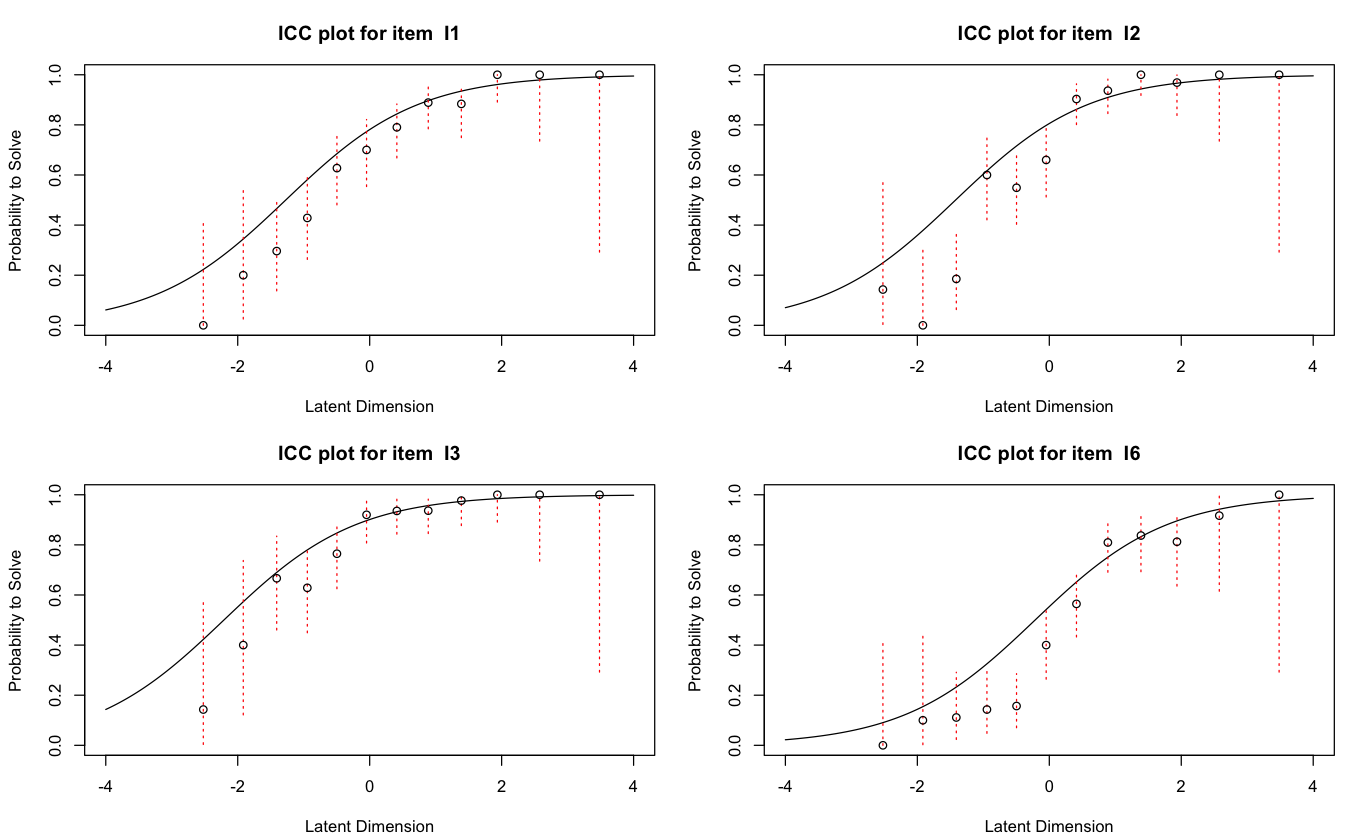

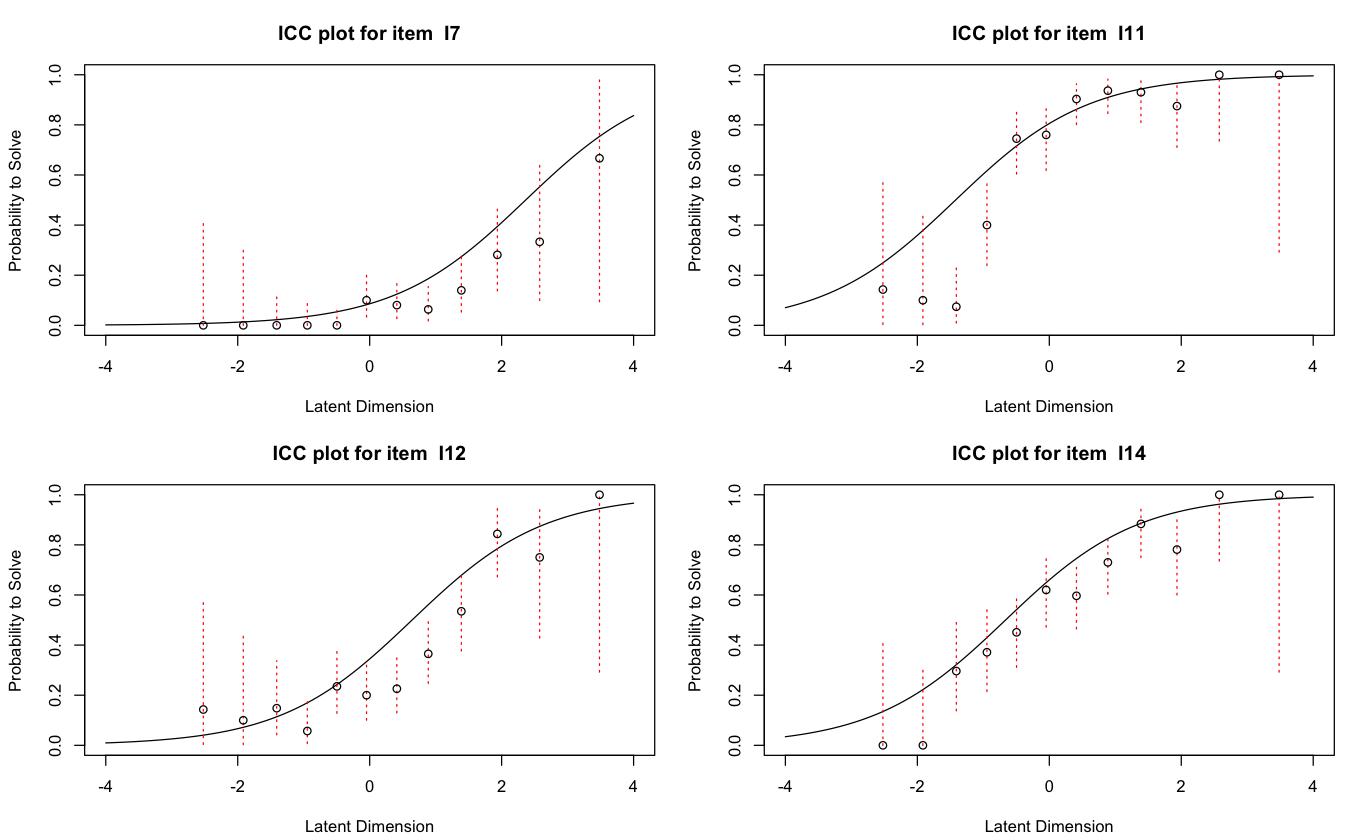

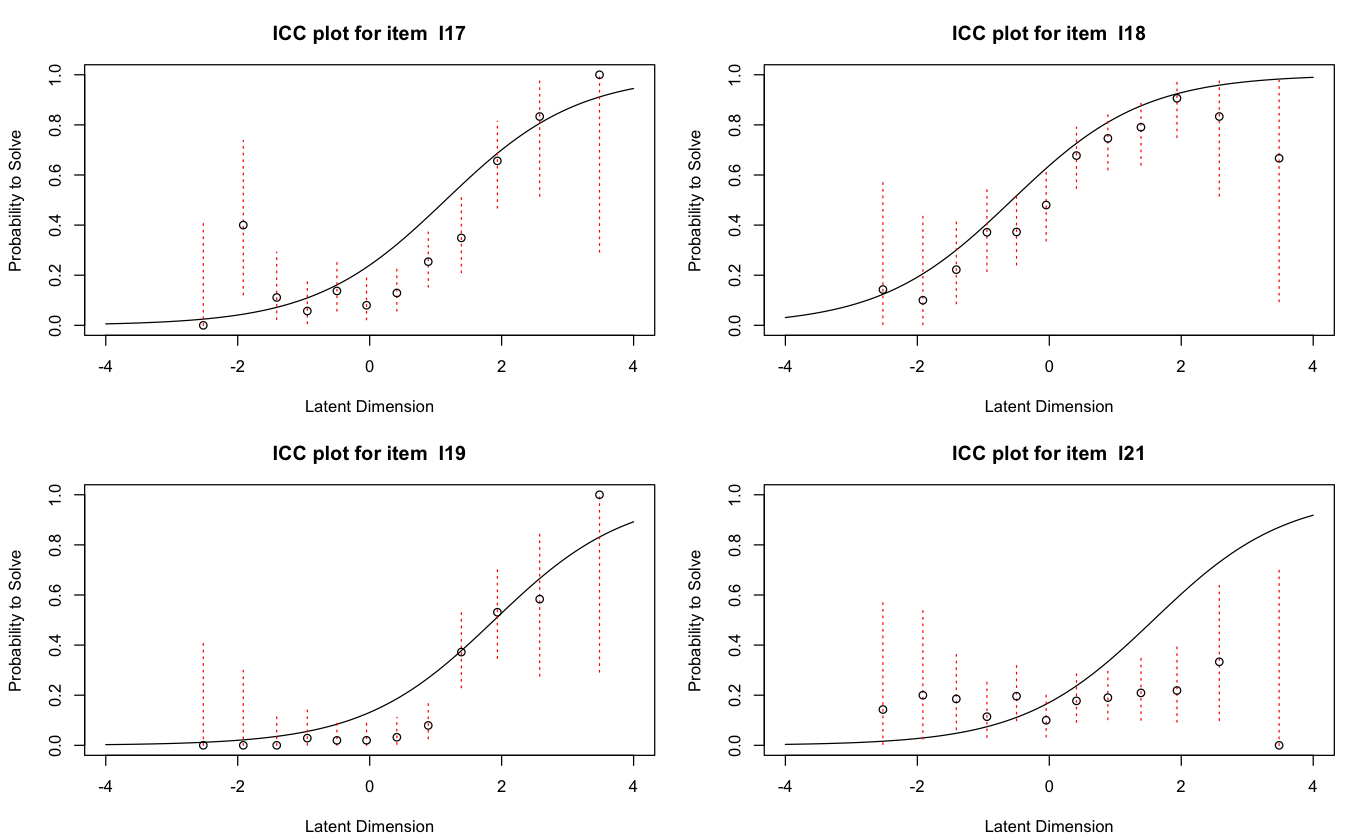

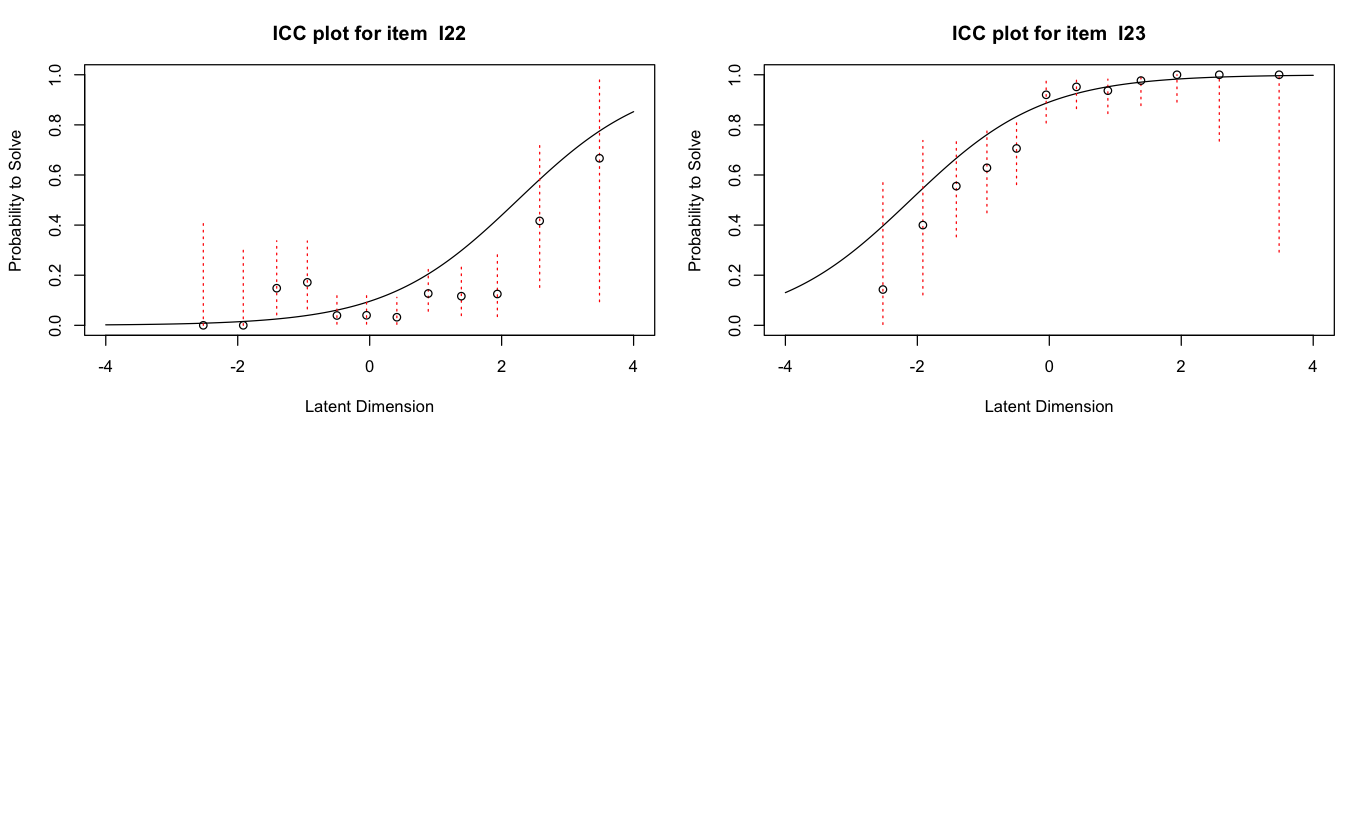

In [20]:
plotICC(
    rm_sum0, 
    item.subset = "all",
    empICC = list("raw"), 
    empCI = list()
)

Le ICC empiriche sono rappresentate dai singoli punti, mentre la ICC attesa sotto il modello di Rasch è indicata dalla linea liscia. Dalle figure precedenti, per gli item 12 e 14 notiamo che in generale la forma dell'ICC empirica è molto ben allineata con l'ICC attesa, ma per l'item 12 l'ICC empirica mostra valori sopra zero anche per le abilità più basse a sinistra della dimensione latente. Questo potrebbe indicare una tendenza al tentativo di indovinare (guessing). Per l'item 19, l'ICC empirica appare più ripida dell'ICC attesa sotto il modello di Rasch. Mostra un salto molto più pronunciato tra la prima metà approssimativa dei punti e i punti rimanenti. Per l'item 21, al contrario, l'ICC empirica è molto più piatta rispetto a quella attesa. Confronteremo la nostra impressione visiva con le statistiche di adattamento degli item per questi item di seguito.

È possibile visualizzare le ICC attese di tutti gli item del test in un unico grafico utilizzando la funzione `plotjointICC()`. Questo grafico ci permette di esaminare come la difficoltà influenzi la probabilità che un candidato risponda correttamente a un item. Ricordiamo che la difficoltà di un item è definita come il livello di abilità in cui una persona ha una probabilità del 50% di rispondere correttamente all’item. Abbiamo aggiunto una linea tratteggiata orizzontale alla probabilità di 0.5 usando il comando `segments`. Il punto in cui un'ICC interseca questa linea rappresenta la sua difficoltà. Questo ci permette di leggere facilmente le difficoltà relative degli item dal grafico. Spostandosi da sinistra a destra, il primo ICC intersecato dalla linea orizzontale corrisponde all’item meno difficile (in questo caso l’item 3, seguito da vicino dall’item 23, come indicato nell’ordine degli item nella legenda), e l’ultimo ICC intersecato dalla linea orizzontale è per l’item più difficile (in questo caso l’item 7).

Da notare che le ICC attese nella figura sono parallele per definizione. Il modello di Rasch assume che le ICC siano parallele, quindi produrrà sempre ICC teoriche o attese parallele, anche quando gli item hanno in realtà pendenze o tassi di guessing diversi, come abbiamo visto in precedenza per le ICC empiriche.

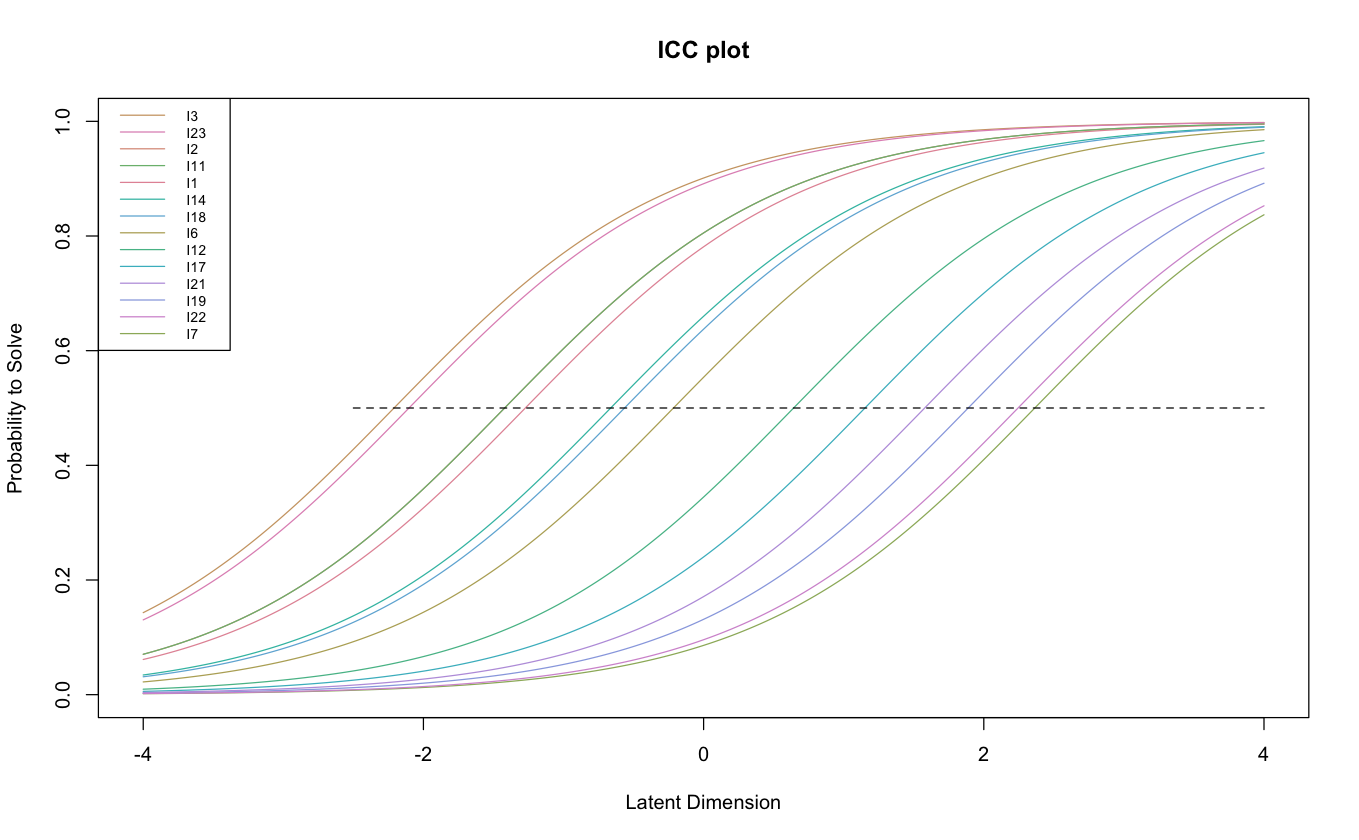

In [21]:
eRm::plotjointICC(rm_sum0, cex = 0.7)
segments(-2.5, 0.5, 4, 0.5, lty = 2)

In alternativa, possiamo generare le ICC usando il pacchetto `mirt`:

Iteration: 16, Log-Lik: -2816.487, Max-Change: 0.00008


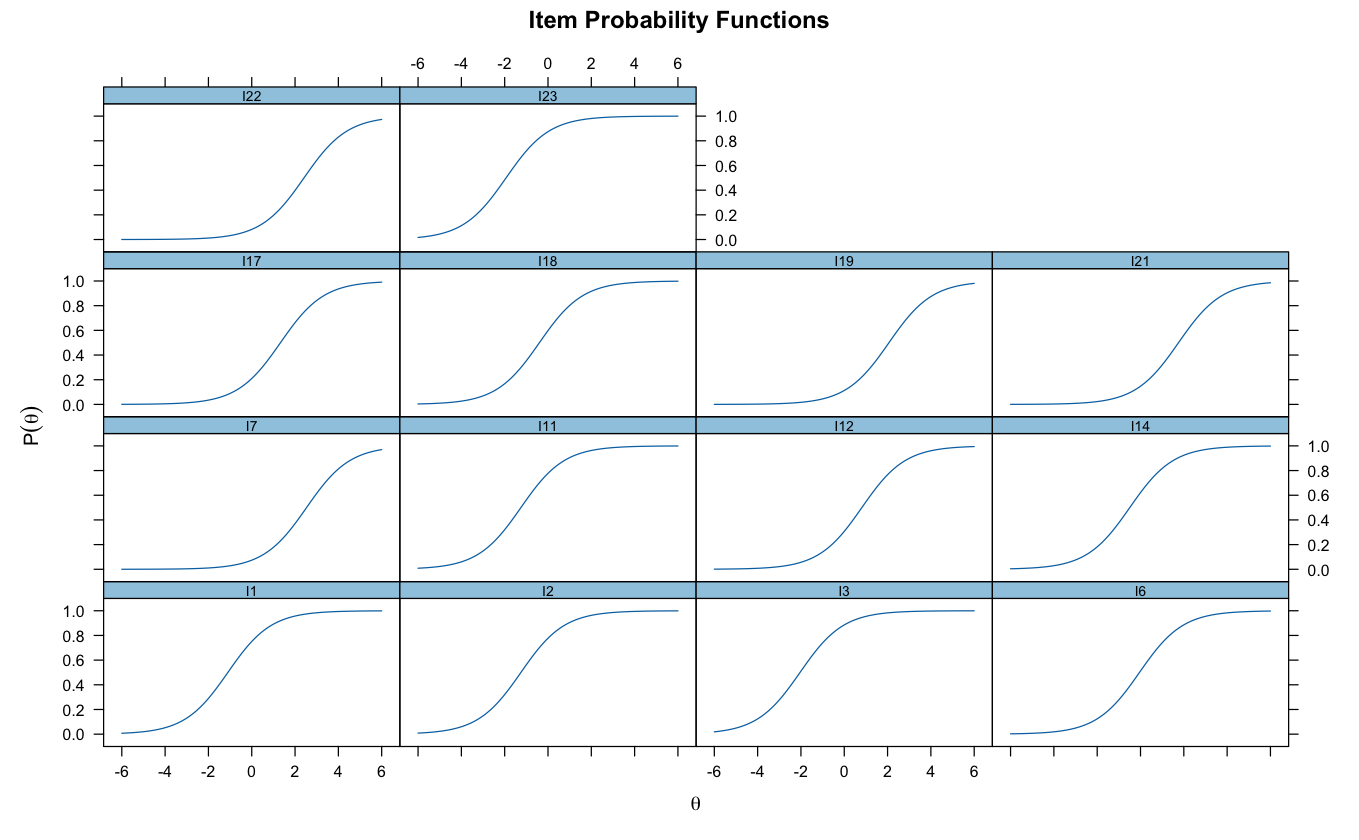

In [22]:
mirt_rm <- mirt(responses, 1, "Rasch")
plot(mirt_rm, type = "trace")

Le curve caratteristiche degli item offrono un quadro dettagliato e visuale di come ciascun item del test si comporta attraverso diversi livelli dell'abilità latente. Per esempio:

1. **Visualizzazione della Difficoltà e della Discriminazione:**
   - Supponiamo di avere un item che mostra una curva con una ripida salita in un punto specifico della scala di abilità. Questo indica che l'item ha una difficoltà concentrata attorno a quel punto e che discrimina efficacemente tra rispondenti con abilità appena al di sotto e al di sopra di quel livello. 
   - Al contrario, una curva più graduale suggerisce che l'item è meno discriminante, con una variazione più ampia nella probabilità di risposta corretta a seconda del livello di abilità.

2. **Identificazione di Lacune nella Valutazione:**
   - Visualizzando le curve di più item, possiamo identificare se ci sono lacune nella copertura dell'abilità latente. Ad esempio, se tutti gli item hanno curve che si concentrano su livelli di abilità bassi, potrebbe esserci una mancanza di item difficili per misurare l'abilità ad alti livelli.
   - Inoltre, se le curve degli item si sovrappongono eccessivamente, potrebbe indicare ridondanza tra gli item, suggerendo che alcuni di essi non aggiungono informazioni uniche alla valutazione.

3. **Confronto tra Diversi Tipi di Item:**
   - Per esempio, gli item progettati per misurare concetti di base potrebbero avere curve che mostrano alta probabilità di risposta corretta anche a livelli di abilità bassi.
   - Al contrario, item progettati per essere più impegnativi potrebbero mostrare probabilità elevate di risposta corretta solo a livelli di abilità più alti.

### Test Grafico

Il test grafico del modello, basato sui principi di Rasch (1960), è un metodo intuitivo per valutare l'invarianza degli item in un test, confrontando i parametri degli item stimati per due gruppi di persone. Affinché il modello di Rasch sia considerato valido, è necessario che le stime dei parametri degli item per i diversi gruppi concordino, fino a una trasformazione lineare. In termini pratici, ciò si traduce nel fatto che, quando visualizzate in un grafico, le stime dei parametri degli item dei due gruppi dovrebbero allinearsi lungo una linea retta.

Per complementare questa analisi, possiamo ricorrere al test del rapporto di verosimiglianza di Andersen (1973), un approccio ben consolidato per verificare l'adeguatezza del modello di Rasch nel rappresentare il comportamento dei partecipanti ai test. Il test di Andersen valuta se le stime dei parametri degli item rimangono consistenti tra diversi gruppi di partecipanti. Se i parametri degli item stimati individualmente per ciascun gruppo differiscono significativamente, ciò indica che il modello di Rasch potrebbe non essere un'adeguata rappresentazione del comportamento osservato nei test.

A differenza del test grafico, il test del rapporto di verosimiglianza confronta il massimo della verosimiglianza condizionata sotto il modello di Rasch con il massimo della verosimiglianza condizionata quando i parametri degli item possono variare tra i gruppi. Questa metodologia offre un'indicazione di quanto efficacemente ciascun modello rappresenti il comportamento dei partecipanti.

Il test del rapporto di verosimiglianza utilizza la statistica di test $T = −2 \cdot log(LR)$, che ha una distribuzione campionaria approssimativamente $\chi^2$ per campioni grandi. Valori del rapporto di verosimiglianza inferiori a 1, o valori elevati di T, suggeriscono una violazione del modello di Rasch.

Il test di Andersen è implementato nel pacchetto `eRm` in `R`, offrendo uno strumento utile per l'analisi. Tuttavia, è importante notare che un risultato non significativo in questo test non può essere interpretato automaticamente come supporto per il modello di Rasch, specialmente se il modello più generale non descrive adeguatamente i dati. Inoltre, la capacità di rilevare differenze tra i gruppi specificati dipende dall'effettiva diversità dei parametri del modello tra questi gruppi. Sono stati messi a punto approcci più flessibili per rilevare le differenze nei parametri.

In [23]:
lrt_mean_split <- LRtest(rm_sum0, splitcr = "mean")
lrt_mean_split


Andersen LR-test: 
LR-value: 79.71 
Chi-square df: 13 
p-value:  0 


L'output di questo test mostra una violazione significativa del modello di Rasch al livello $\alpha$ = 0.05. 

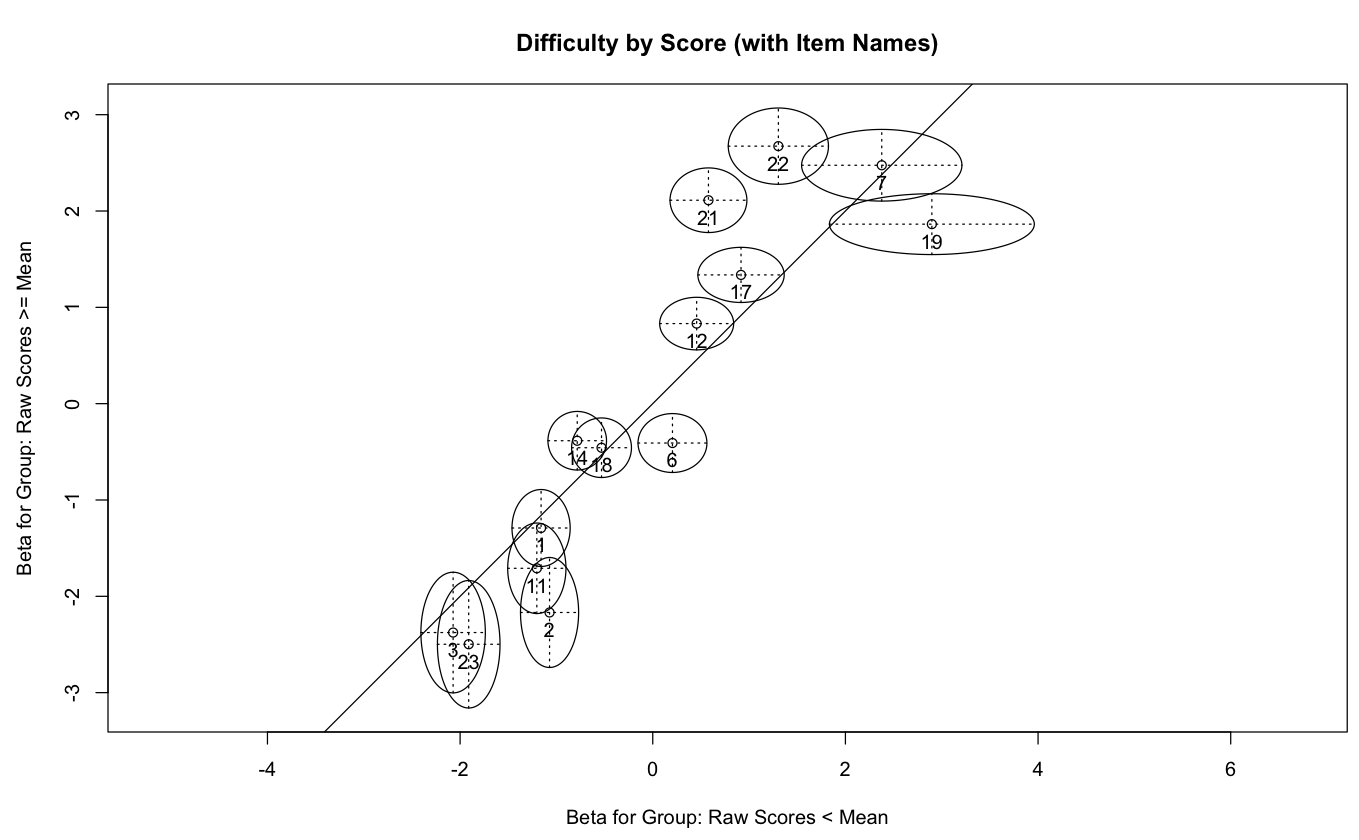

In [24]:
plotGOF(
    lrt_mean_split,
    tlab = "item", pos = 1,
    main = "Difficulty by Score (with Item Names)",
    conf = list(gamma = 0.95, col = 1)
)

Ora possiamo tracciare le stime delle difficoltà di ciascun gruppo utilizzando la funzione `plotGOF()` per creare il test grafico. La funzione `plotGOF()` prende il risultato di `LRtest()` e traccia le stime dei parametri degli item per i due gruppi. Per facilitare la valutazione visiva, `plotGOF()` può opzionalmente etichettare gli item e aggiungere ellissi di confidenza. 

Per creare il grafico per il test grafico basato sulla divisione media, possiamo procedere in questo modo: ogni piccolo cerchio nella Figura mostra le stime delle difficoltà per un singolo item. La coordinata x di un cerchio indica la sua stima di difficoltà per i partecipanti al test con punteggi sotto la media e la sua coordinata y indica la stima di difficoltà per i partecipanti al test con punteggi sopra la media. La linea y = x è fornita come riferimento, poiché i punti che cadono su questa linea avrebbero la stessa stima in entrambi i gruppi. La distanza tra qualsiasi punto e la linea di riferimento y = x indica quanto le stime differiscono tra i due gruppi. Indica anche la direzione di questa differenza. Gli item sotto la linea sono più difficili per i partecipanti al test con punteggi sotto la media, mentre gli item sopra la linea sono più difficili per i partecipanti al test con punteggi sopra la media.

Gli assi orizzontali e verticali mostrano intervalli di confidenza per le stime per ciascun gruppo di partecipanti al test. La larghezza di ciascun intervallo di confidenza è determinata dall'elemento gamma della lista fornita a `conf`. L'impostazione predefinita `gamma = .95` produce intervalli di confidenza al 95% per ciascun asse dell'ellisse. Quando un'ellisse di confidenza non incrocia la linea di riferimento, l'item rispettivo è diagnosticato come mostrante un significativo DIF.

La figura indica che gli item 2, 6, 21 e 22 differiscono significativamente tra le persone con punteggi sopra e sotto la media, poiché le loro ellissi di confidenza non incrociano la linea di riferimento. Gli item 21 e 22 sono più difficili per le persone con punteggi pari o superiori alla media, mentre gli item 2 e 6 sono più difficili per le persone con punteggi sotto la media. Tali violazioni del modello possono verificarsi quando le ICC osservate differiscono dalle ICC attese sotto il modello di Rasch per i partecipanti al test con abilità basse e alte. Questo può accadere, ad esempio, se è presente il tentativo di indovinare (guessing), o se la pendenza è più ripida o meno ripida di quanto previsto dal modello di Rasch.

Possiamo anche fornire all'argomento `splitcr` una variabile che divide i partecipanti al test in gruppi. Ad esempio, possiamo testare se i parametri degli item differiscono in base al genere passando un vettore contenente le appartenenze di gruppo come argomento splitcr. 

In [25]:
lrt_gender <- LRtest(rm_sum0, splitcr = gender)
lrt_gender


Andersen LR-test: 
LR-value: 32.973 
Chi-square df: 13 
p-value:  0.002 


Come nel test precedente, anche il Test del Rapporto di Verosimiglianza (LRT) per il genere indica una violazione significativa del modello di Rasch al livello α = 0.05.

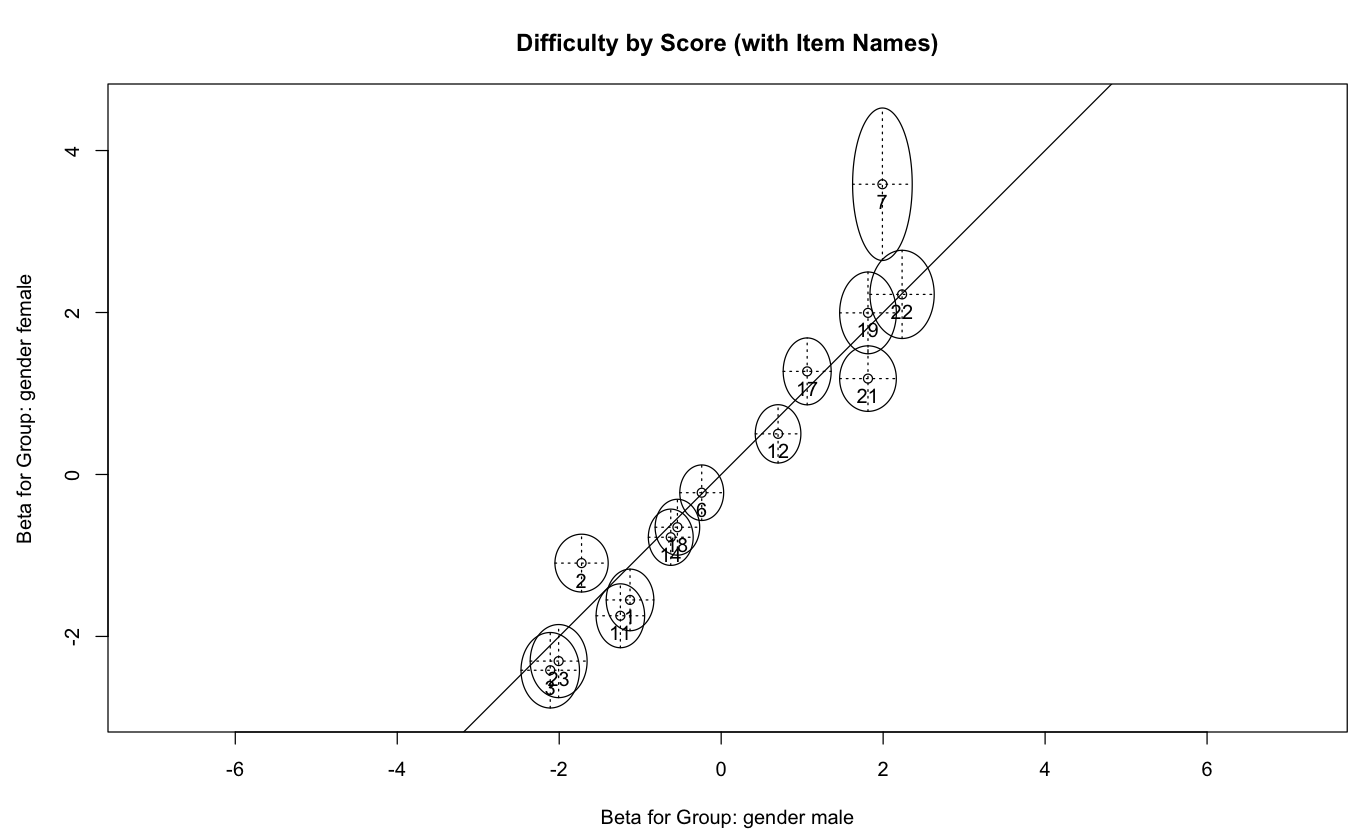

In [26]:
plotGOF(
    lrt_gender,
    tlab = "item", pos = 1,
    main = "Difficulty by Score (with Item Names)",
    conf = list(gamma = 0.95, col = 1)
)

La figura indica che gli item 2, 7 e 21 differiscono tra partecipanti al test femminili e maschili. Gli item 2 e 7 sono più difficili per i partecipanti femminili, mentre l'item 21 è più difficile per i partecipanti maschili.

### Test di Wald

Le impostazioni del test del rapporto di verosimiglianza di Andersen (1973) e del test di Wald sono molto simili. Entrambi i test si basano sull'idea che il modello di Rasch sia un modello ragionevole per i dati dei test solo se i parametri degli item stimati non variano sistematicamente tra gruppi di persone. In entrambi i test, consideriamo le stime dei parametri degli item per ciascun gruppo di persone. A differenza del test del rapporto di verosimiglianza, tuttavia, il test di Wald confronta direttamente le stime dei parametri degli item dei gruppi. In sostanza, il test di Wald calcola la differenza tra la stima del primo gruppo della difficoltà dell'item i, β̂(1)i, e quella del secondo gruppo, β̂(2)i. Questa differenza viene divisa per il suo errore standard per tenere conto del fatto che tutte le stime sono soggette a rumore. Questo porta alla statistica di test per l'item i:

$$ 
T_i = \frac{\hat{\beta}^{(1)}_i - \hat{\beta}^{(2)}_i}{\sqrt{se(\hat{\beta}^{(1)}_i)^2 + se(\hat{\beta}^{(2)}_i)^2}}, 
$$

dove $ se(\hat{\beta}^{(1)}_i) $ e $ se(\hat{\beta}^{(2)}_i) $ indicano rispettivamente gli errori standard di $ \hat{\beta}^{(1)}_i $ e $ \hat{\beta}^{(2)}_i $.

Per campioni di grandi dimensioni, $ T_i $ approssimativamente segue una distribuzione normale standard sotto l'ipotesi nulla che il vero parametro dell'item sia lo stesso per entrambi i gruppi. Valori estremi di $ T_i $ sono improbabili sotto la distribuzione normale. Quindi, un valore estremo di $ T_i $, con un piccolo valore p, indica che l'item i viola il modello di Rasch.

Eseguiamo il test con `R`:

In [27]:
Waldtest(rm_sum0, splitcr = "mean")


Wald test on item level (z-values):

         z-statistic p-value
beta I1       -0.514   0.607
beta I2       -3.328   0.001
beta I3       -0.838   0.402
beta I6       -2.555   0.011
beta I7        0.210   0.834
beta I11      -1.773   0.076
beta I12       1.562   0.118
beta I14       1.821   0.069
beta I17       1.550   0.121
beta I18       0.333   0.739
beta I19      -1.827   0.068
beta I21       5.768   0.000
beta I22       4.106   0.000
beta I23      -1.560   0.119


Questi test indicano nuovamente che gli item 2, 6, 21 e 22 differiscono significativamente tra i partecipanti al test con punteggi sopra e sotto la media.

Possiamo anche eseguire il test per la differenza tra maschi e femmine:

In [28]:
Waldtest(rm_sum0, splitcr = gender)


Wald test on item level (z-values):

         z-statistic p-value
beta I1       -1.727   0.084
beta I2        2.543   0.011
beta I3       -1.020   0.308
beta I6        0.067   0.946
beta I7        3.089   0.002
beta I11      -1.978   0.048
beta I12      -0.861   0.389
beta I14      -0.673   0.501
beta I17       0.815   0.415
beta I18      -0.493   0.622
beta I19       0.583   0.560
beta I21      -2.305   0.021
beta I22      -0.030   0.976
beta I23      -1.019   0.308


I risultati qui concordano in gran parte anche con la figura precedente. In linea con il test grafico, il test di Wald indica che gli item 2, 7 e 21 differiscono tra i gruppi.

### Ancoraggio

L'ancoraggio è una procedura cruciale quando si confrontano le stime dei parametri degli item tra diversi gruppi, un passo fondamentale in test come il Wald e in metodi grafici. Tale processo necessita di particolare attenzione perché implica la restrizione di alcuni parametri degli item per allineare le scale latenti tra i gruppi. Ad esempio, fissare il parametro del primo item a zero in entrambi i gruppi crea un punto di riferimento comune, ma anche limitazioni.

La scelta degli item di ancoraggio è delicata: fissare un parametro in entrambi i gruppi significa non poter più valutare la differenza per quell'item specifico. La selezione dovrebbe essere guidata da un'attenta analisi dei dati e da considerazioni teoriche. Approcci guidati dai dati sono stati proposti per identificare item invarianti o escludere quelli con DIF, processo noto come purificazione. Tuttavia, occorre cautela: anche metodi ben progettati possono portare a conclusioni errate se gli item di ancoraggio scelti sono inappropriati.

In pratica, spesso si adotta una restrizione in cui la somma dei parametri degli item è zero per tutti i gruppi. Questo approccio, adottato da pacchetti software come eRm e difR in R, si basa sull'assunzione che eventuali DIF si annullino su tutti gli item. Ma se questa assunzione non è valida, o se l'ancoraggio include item con DIF, potremmo incorrere in errori interpretativi.

In sintesi, l'ancoraggio è una strategia potente ma che richiede un'attenta considerazione e un'analisi critica. È fondamentale non solo selezionare gli item di ancoraggio adeguati ma anche interpretare i risultati con una comprensione chiara delle ipotesi e delle potenziali limitazioni del metodo scelto.

In [29]:
resp <- as.matrix(responses)
anchortest(
    resp ~ gender,
    class = "constant",
    select = "MPT"
)

Anchor items:
respI23, respI3, respI22, respI12

Final DIF tests:

	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
              Estimate Std. Error z value Pr(>|z|)   
respI1 == 0   0.219719   0.291240   0.754  0.45059   
respI2 == 0  -0.833442   0.293433  -2.840  0.00451 **
respI3 == 0   0.102831   0.268527   0.383  0.70176   
respI6 == 0  -0.218867   0.271100  -0.807  0.41948   
respI7 == 0  -1.796947   0.570838  -3.148  0.00164 **
respI11 == 0  0.295994   0.298354   0.992  0.32115   
respI12 == 0 -0.002993   0.227220  -0.013  0.98949   
respI14 == 0 -0.051342   0.274131  -0.187  0.85143   
respI17 == 0 -0.415041   0.307060  -1.352  0.17648   
respI18 == 0 -0.092938   0.272840  -0.341  0.73338   
respI19 == 0 -0.386569   0.360996  -1.071  0.28424   
respI21 == 0  0.425198   0.320519   1.327  0.18464   
respI22 == 0 -0.193457   0.300373  -0.644  0.51954   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Univariate p values reported)


In [30]:
anchortest(
    resp ~ gender,
    class = "forward",
    select = "MTT"
)

Anchor items:
respI23, respI12, respI18, respI14, respI6, respI1, respI11, respI19,
respI17

Final DIF tests:

	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
             Estimate Std. Error z value Pr(>|z|)   
respI1 == 0   0.28177    0.23616   1.193  0.23283   
respI2 == 0  -0.77140    0.26596  -2.900  0.00373 **
respI3 == 0   0.16488    0.32294   0.511  0.60967   
respI6 == 0  -0.15682    0.21567  -0.727  0.46715   
respI7 == 0  -1.73490    0.55736  -3.113  0.00185 **
respI11 == 0  0.35804    0.24322   1.472  0.14099   
respI12 == 0  0.05905    0.22616   0.261  0.79401   
respI14 == 0  0.01070    0.21884   0.049  0.96099   
respI17 == 0 -0.35300    0.25138  -1.404  0.16026   
respI18 == 0 -0.03089    0.21750  -0.142  0.88706   
respI19 == 0 -0.32452    0.30298  -1.071  0.28412   
respI21 == 0  0.48724    0.29524   1.650  0.09887 . 
respI22 == 0 -0.13141    0.37175  -0.353  0.72372   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Univaria

In [31]:
anchortest(
    resp ~ gender,
    select = "Gini"
)

Anchor items:
respI23

Final DIF tests:

	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
              Estimate Std. Error z value Pr(>|z|)   
respI1 == 0   0.126100   0.387369   0.326  0.74478   
respI2 == 0  -0.927061   0.389044  -2.383  0.01718 * 
respI3 == 0   0.009212   0.427183   0.022  0.98279   
respI6 == 0  -0.312486   0.376562  -0.830  0.40663   
respI7 == 0  -1.890565   0.632101  -2.991  0.00278 **
respI11 == 0  0.202375   0.392278   0.516  0.60593   
respI12 == 0 -0.096612   0.386789  -0.250  0.80276   
respI14 == 0 -0.144961   0.376949  -0.385  0.70056   
respI17 == 0 -0.508660   0.407380  -1.249  0.21181   
respI18 == 0 -0.186557   0.376409  -0.496  0.62016   
respI19 == 0 -0.480188   0.450796  -1.065  0.28679   
respI21 == 0  0.331579   0.418092   0.793  0.42773   
respI22 == 0 -0.287076   0.476210  -0.603  0.54662   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Univariate p values reported)


Gli output di `R` della funzione `anchortest()` elencano gli item di ancoraggio selezionati dai rispettivi approcci di selezione dell'ancoraggio, oltre ai risultati del test di Wald basati su questi item di ancoraggio. Tutti e tre gli approcci portano a risultati in cui solo gli item 2 e 7 mostrano DIF per genere, mentre il test grafico e il test di Wald in eRm hanno identificato anche l'item 21 e l'item 11 (al limite) come aventi DIF.

Riesaminando il test grafico nella figura precedente, notiamo che gli item 2 e 7 mostrano DIF nella stessa direzione (sopra la diagonale), mentre gli item 21 e 11 sono orientati nella direzione opposta (sotto la diagonale) e in misura minore.

Considerando questi risultati nel loro insieme, si può concludere che potrebbe essere presente un DIF non bilanciato e che la diagonale usata nella Figura 6.4 non è ideale per valutare gli item. Per illustrare ciò, tracciamo manualmente una linea di riferimento alternativa attraverso la posizione dell'item 23, che è stato selezionato come item di ancoraggio (primario) dai tre approcci presentati in psychotools, utilizzando il comando `abline`.

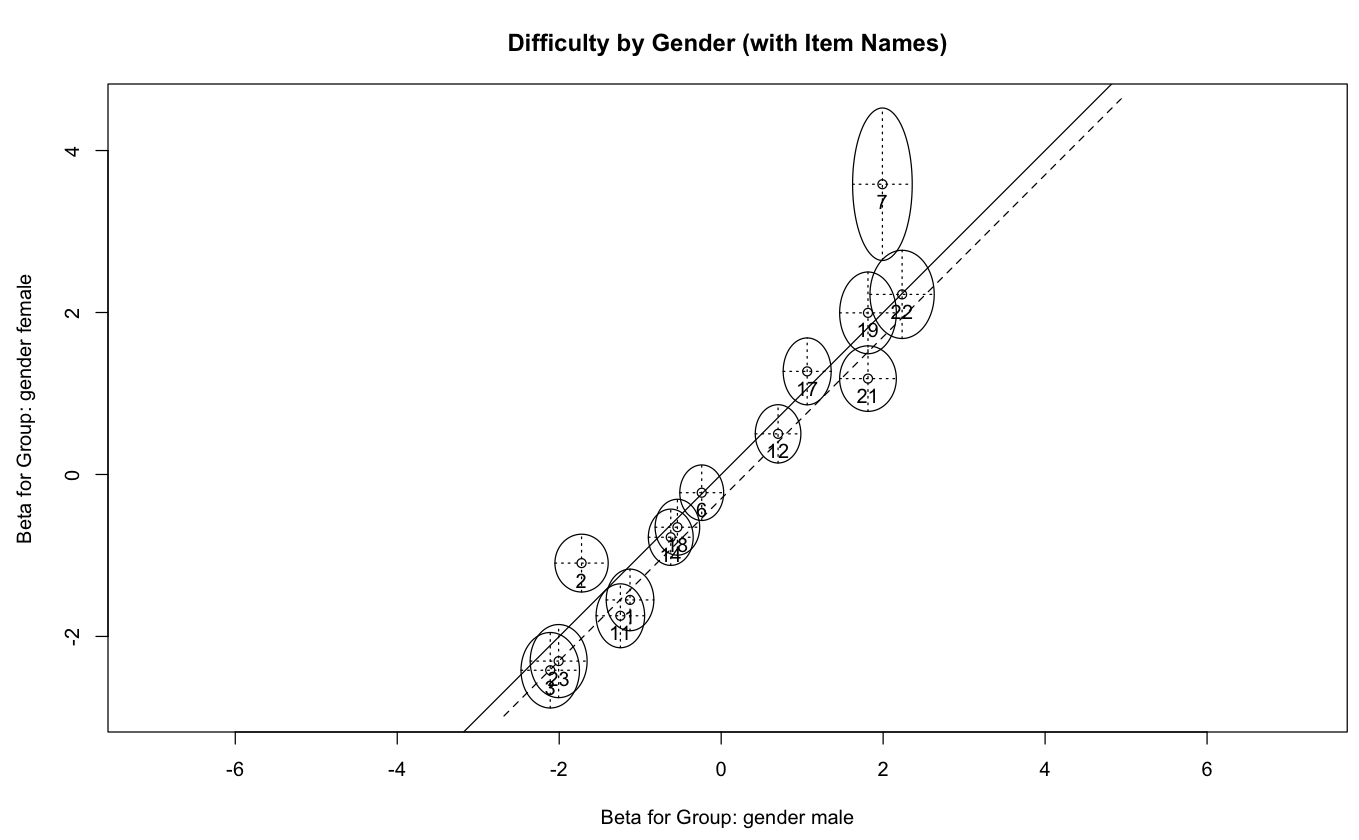

In [32]:
 plotGOF(
    lrt_gender,
    tlab = "item", pos = 1,
    main = "Difficulty by Gender (with Item Names)",
    conf = list(gamma = 0.95, col = 1)
)
abline(-0.3, 1, lty=2)

Come si può vedere nella figura risultante, basandoci sulla linea di riferimento alternativa, non troviamo più DIF negli item 11 e 21, ma gli item 2 e 7 mostrano ancora più chiaramente un DIF.

Per questo set di dati, la stessa conclusione viene raggiunta in `eRm` quando si utilizza la funzione `stepwiseIt()`, che esegue diversi test di Wald e ad ogni passo esclude l'item singolo con la statistica di test più grande.

In [33]:
stepwiseIt(rm_sum0, criterion = list("Waldtest", gender))

Eliminated item - Step 1: I7
Eliminated item - Step 2: I2



Results for stepwise item elimination:
Number of steps: 2 
Criterion: Waldtest

           z-statistic p-value
Step 1: I7       3.089   0.002
Step 2: I2       3.059   0.002


Utilizzando questo metodo, dopo l'esclusione degli item 7 e 2, che presentavano il DIF più marcato, non si rilevano più differenze significative nei test degli item rimanenti. Per visualizzare meglio questo processo, immaginiamo la figura precedente: inizialmente, la linea di riferimento corrisponde alla diagonale solida. Tuttavia, dopo aver eliminato l'item 7, questa linea si sposta verso quella tratteggiata nel secondo passaggio e, rimuovendo poi l'item 2, si allinea o si avvicina molto alla linea tratteggiata nel terzo passaggio. Di conseguenza, gli item restanti non mostrano più un DIF significativo.

In sintesi, mentre i test grafici e di Wald basati sulla restrizione della somma zero possono risultare ingannevoli in presenza di un DIF non bilanciato, l'impiego di metodi di ancoraggio avanzati e l'approccio di eliminazione graduale degli item possono offrire una visione più accurata e dettagliata della situazione.


## Rimozione di item 

Se questa analisi facesse parte della costruzione di un test reale, gli item che mostrano DIF (o altre anomalie nelle analisi successive) dovrebbero essere attentamente esaminati da esperti di contenuto per decidere se modificarli o rimuoverli dal test. Nella discussione seguente, tuttavia, non rimuoveremo gli item perché desideriamo mantenere il set di dati completo. Tuttavia, se si desiderasse rimuovere alcuni item (ovvero colonne) dal set di dati, ciò potrebbe essere fatto con i seguenti comandi.

In [34]:
responses_removeDIFitems <- responses[, -which(colnames(responses) %in% c("I2", "I7"))]
colnames(responses_removeDIFitems)

[1] "I1"  "I3"  "I6"  "I11" "I12" "I14" "I17" "I18" "I19" "I21" "I22" "I23"

Dopo aver rimosso degli item, l'intero processo dovrebbe ricominciare da capo, rifacendo il modello di Rasch e indagando sugli item rimanenti. 

### Test di Martin-Löf 

Nella sezione precedente, abbiamo visto che il test del rapporto di verosimiglianza di Andersen (1973) verifica l'ipotesi che i parametri degli item siano invarianti per vari gruppi di persone. Una ipotesi correlata riguarda l'invarianza dei parametri delle persone per diversi gruppi di item.

Qui, la domanda fondamentale è se diversi gruppi di item misurino tratti latenti differenti. Ciò rappresenterebbe una violazione del modello di Rasch, il quale implica un singolo tratto latente alla base di tutti gli item. Se questo tipo di violazione del modello viene rilevato, un modello IRT multidimensionale potrebbe essere più appropriato. 

Un metodo comune per valutare la dimensionalità in generale è l'analisi fattoriale esplorativa. Qui invece descriveremo il test di Martin-Löf che affronta l'ipotesi alternativa secondo cui gruppi di item misurano tratti latenti differenti ed è disponibile nel pacchetto `eRm`. Come il test del rapporto di verosimiglianza di Andersen, questo test si basa sul confronto di due verosimiglianze condizionate. La prima verosimiglianza condizionata Lu(r,β) è quella del modello di Rasch. La seconda verosimiglianza condizionata Lu(r1, r2, β) è nuovamente quella di un modello più generale che ora permette diversi parametri di persona per specifici gruppi di item. I gruppi di item devono essere definiti prima dell'analisi, il che può essere fatto in base alle loro difficoltà (cioè, testiamo item facili contro difficili) o in base a diverse dimensioni latenti che si sospetta siano misurate dai gruppi di item (cioè, il gruppo di item 1 è sospettato di misurare una dimensione latente diversa rispetto al gruppo di item 2). Se la seconda verosimiglianza è maggiore, ciò indica una violazione del modello di Rasch (analogamente al test del rapporto di verosimiglianza di Andersen).

Il test di Martin-Löf è spesso descritto come un test per la unidimensionalità. Certi tipi di multidimensionalità possono anche manifestarsi come DIF. Per questa ragione, i test che mirano a rilevare il DIF, possono anche essere sensibili a certe violazioni della unidimensionalità.

In [35]:
mloef_median <- MLoef(rm_sum0, splitcr = "median")
mloef_median


Martin-Loef-Test (split criterion: median)
LR-value: 67.083 
Chi-square df: 48 
p-value: 0.036 


Otteniamo un valore p inferiore a 0.05. Ciò indica che le stime dei parametri delle persone ottenute dagli item facili e difficili differiscono in modo significativo, ovvero, una violazione del modello di Rasch.

## Item e Person Fit

### Tests e Statistiche di Bontà di Adattamento

In questa sezione esaminiamo una varietà di metodi per valutare l'adattamento dei dati di risposta agli item e al modello di Rasch. Alcuni di questi metodi sono test statistici formali, mentre altri sono statistiche descrittive per le quali sono stati suggeriti nella letteratura dei limiti critici empirici. Vedremo anche che esistono approcci per valutare l'adattamento a livello dell'intero test psicologico, così come approcci focalizzati sulla valutazione dell'adattamento di singoli item o individui.

#### Test di Bontà di Adattamento χ2 e G2

Nella valutazione del modello di Rasch, esaminiamo due classi principali di test di bontà di adattamento: il test χ2 e il test G2, entrambi noti nell'analisi delle tabelle di contingenza. A differenza dei test del rapporto di verosimiglianza o dei test di Martin-Löf, il test χ2 non confronta l'adattamento relativo di due modelli. Piuttosto, esso valuta quanto accuratamente i modelli di risposta previsti dal modello di Rasch corrispondano ai modelli di risposta osservati. Questo avviene attraverso il confronto tra il numero di partecipanti che mostrano ciascun modello di risposta osservato e il numero previsto dal modello di Rasch.

Il principio dei test di bontà di adattamento χ2 per il modello di Rasch è basato sull'analisi di tutti i possibili modelli di risposta (combinazioni di 0 e 1 per risposte errate e corrette). Definiamo Ou come il numero osservato di partecipanti con il modello di risposta u e Eu come il numero previsto sotto il modello di Rasch. La statistica del test χ2 è data da:

$$ T = \sum_{u} \frac{(O_u - E_u)^2}{E_u} $$

In questa formula, le differenze tra osservazioni e previsioni sono elevate al quadrato e poi ponderate inversamente rispetto alla frequenza attesa. In campioni di grandi dimensioni, T segue approssimativamente una distribuzione χ2, se il modello di Rasch è appropriato. Valori alti di T indicano una cattiva adattazione del modello.

Tuttavia, il test χ2 richiede che ogni modello di risposta abbia una frequenza attesa sufficientemente alta, una condizione spesso non soddisfatta in test con molti item. In questi casi, il test χ2 non segue una distribuzione χ2 sotto l'ipotesi nulla, rendendolo poco pratico. Una soluzione potrebbe essere quella di raggruppare i modelli di risposta per aumentare le frequenze attese.

Parallelamente, la statistica del rapporto di verosimiglianza G2, anch'essa derivante dall'analisi dei dati categoriali, è calcolata come:

$$ G^2 = 2 \sum_{u} O_u \log \left( \frac{O_u}{E_u} \right) $$

G2 confronta le frequenze osservate con quelle attese, anziché le verosimiglianze di due modelli. Se le frequenze attese sono vicine a quelle osservate, il rapporto $\frac{O_u}{E_u}$ si avvicina a 1, rendendo il logaritmo naturale $\log\left(\frac{O_u}{E_u}\right)$ vicino a 0 e la statistica G2 tende a 0, indicando un buon adattamento. Anche G2 segue una distribuzione χ2 se il modello di Rasch è appropriato. Tuttavia, proprio come per il test χ2, G2 è praticabile solo con grandi frequenze attese, limitandone l'uso effettivo. Nonostante ciò, G2 è importante da comprendere poiché molte altre statistiche di test si basano su di esso.

### Statistica M2

La statistica M2, sviluppata da Maydeu-Olivares e Joe (2006), affronta il problema dei modelli di risposta rari che possono complicare i test χ2. Invece di confrontare le frequenze di interi modelli di risposta, la statistica M2 utilizza le informazioni provenienti dagli item individuali e dalle coppie di item. Specificatamente, confronta:
1. Le frequenze attese e osservate delle risposte corrette agli item individuali.
2. Le frequenze attese e osservate delle risposte corrette a entrambi gli item in una coppia di item.

Per esempio, con due item, confronterebbe le frequenze osservate e attese per una risposta corretta al primo item, al secondo item e ad entrambi gli item insieme. Questo approccio è simile all'analisi delle tabelle di frequenza per le coppie di item. La statistica M2, come il test di bontà di adattamento χ2, implica un cattivo adattamento tra i dati e il modello di Rasch se produce un valore elevato o, equivalentemente, un valore p piccolo. Senza violazione del modello, la statistica M2 segue approssimativamente una distribuzione χ2 con gradi di libertà calcolati come $ k - d $, dove $ k $ è il numero di frequenze confrontate e $ d $ è il numero di parametri liberi del modello.

### Errore Quadratico Medio di Approssimazione (RMSEA)

Il RMSEA deriva dalla statistica M2. Utilizza i gradi di libertà (nuovamente $ k - d $) e la dimensione del campione $ P $ per calcolare il valore RMSEA. La formula per il RMSEA è:

$$ \text{RMSEA} = \sqrt{\frac{M2 - df}{P \cdot df}} $$

Valori di RMSEA vicini a 0 generalmente indicano un buon adattamento del modello ai dati. Sebbene non esistano linee guida universalmente accettate per interpretare il RMSEA, un valore intorno a 0,05 è spesso considerato indicativo di un buon adattamento del modello.

### Residuo Quadratico Medio Standardizzato (SRMSR)

SRMSR è un'altra statistica di adattamento complessivo che confronta le correlazioni o le covarianze osservate tra tutte le coppie di item con quelle previste sotto il modello di Rasch (o un altro modello della teoria della risposta agli item). Valori vicini a 0 suggeriscono un buon adattamento del modello. Maydeu-Olivares (2013) raccomanda l'uso di un valore di soglia di 0.05 per SRMSR, simile al RMSEA.

Nel complesso, queste statistiche (M2, RMSEA e SRMSR) sono utili per valutare l'adattamento di un modello, come il modello di Rasch, a un dato insieme di dati di risposta agli item. Forniscono diverse prospettive attraverso le quali la congruenza tra i dati e il modello teorico può essere valutata, ognuna con il suo focus unico e metodo di calcolo.

In [36]:
fit_rasch <- mirt(responses, 1, itemtype = "Rasch", verbose = FALSE)
fit_rasch


Call:
mirt(data = responses, model = 1, itemtype = "Rasch", verbose = FALSE)

Full-information item factor analysis with 1 factor(s).
Converged within 1e-04 tolerance after 16 EM iterations.
mirt version: 1.41 
M-step optimizer: nlminb 
EM acceleration: Ramsay 
Number of rectangular quadrature: 61
Latent density type: Gaussian 

Log-likelihood = -2816.487
Estimated parameters: 15 
AIC = 5662.973
BIC = 5722.845; SABIC = 5675.249
G2 (16368) = 1318.65, p = 1
RMSEA = 0, CFI = NaN, TLI = NaN

In [37]:
M2(fit_rasch)

,M2,df,p,RMSEA,RMSEA_5,RMSEA_95,SRMSR,TLI,CFI
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stats,277.5505,90,0,0.0722689,0.06261658,0.08191791,0.09413757,0.7494602,0.7522134


La statistica M2 è alta e significativa, indicando che ci sono differenze preoccupanti tra il modello e i dati. Questo è ulteriormente supportato da un RMSEA troppo alto e da un CFA e TLI lontani da 1.

Ricordiamo il significato degli indici RMSEA, CFA e TLI.

**RMSEA (Root Mean Square Error of Approximation)**: 
   - Il RMSEA è una misura di adattamento che valuta quanto bene un modello si adatta ai dati a livello di popolazione. 
   - Un valore basso di RMSEA indica un buon adattamento, suggerendo che il modello approssima bene la realtà.
   - Generalmente, un RMSEA inferiore a 0.05 o 0.06 è considerato indicativo di un ottimo adattamento del modello.

**CFA (Comparative Fit Index)**: 
   - Il CFA è un indice relativo di bontà di adattamento che confronta il modello specificato con un modello nullo o di base. 
   - Valori più vicini a 1 indicano un adattamento migliore. Un CFA superiore a 0.90 o 0.95 è spesso considerato indicativo di un buon adattamento.

**TLI (Tucker-Lewis Index)**: 
   - Simile al CFA, il TLI è un altro indice relativo di adattamento che tiene conto della complessità del modello.
   - Anche per il TLI, valori più vicini a 1 indicano un adattamento migliore. Valori superiori a 0.90 o 0.95 sono generalmente considerati buoni.

### Valutare l'Adattamento degli Item

Tuttavia, nell'IRT, ci interessiamo maggiormente agli indici di adattamento degli item e delle persone. L'IRT ci consente di valutare quanto bene ogni item si adatti al modello e se i pattern di risposta individuali sono allineati con il modello.

Iniziamo con l'addattamento agli item. Sono stati proposti diversi indici per valutare l'adattamento degli item e possiamo utilizzare la funzione `itemfit()` per ottenere una varietà di questi indici. Di default, riceviamo l'S_X2 di Orlando e Thissen (2000) con i corrispondenti gradi di libertà (dfs), RMSEA e valori p. Questo test dovrebbe risultare non significativo per indicare un buon adattamento dell'item. Come vediamo qui sotto, diversi item mostra un cattivo adattamento. 

In [38]:
itemfit(fit_rasch)

item,S_X2,df.S_X2,RMSEA.S_X2,p.S_X2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
I1,4.149893,7,0.00000000,7.623599e-01
I2,19.333566,7,0.06645212,7.204188e-03
I3,5.527890,7,0.00000000,5.958220e-01
I6,14.085952,8,0.04366493,7.955244e-02
I7,8.976726,7,0.02660344,2.543313e-01
I11,23.364314,7,0.07654440,1.472551e-03
I12,17.673493,7,0.06181841,1.353327e-02
I14,9.789665,7,0.03160389,2.008096e-01
I17,35.134304,7,0.10036508,1.055277e-05


### Statistiche di Infit e Outfit

Nella sezione precedente abbiamo discusso i test χ2 e M2, basati sul confronto tra le frequenze osservate e quelle attese secondo il modello di Rasch. Le statistiche di adattamento presentate di seguito si basano su un approccio simile, utilizzando i residui di Rasch. Questi sono le differenze tra le risposte osservate (vale a dire, le risposte 0 o 1 per gli item dicotomici) e i loro valori attesi (cioè, le probabilità predette di una risposta corretta secondo il modello di Rasch). Tipicamente, questi valori attesi vengono calcolati in base alle stime dei parametri degli item e delle persone.

Generalmente, quando c'è un buon adattamento tra i dati e il modello, si può prevedere che i residui siano piccoli. Pertanto, è naturale che i residui di Rasch possano essere utilizzati per valutare l'adattamento del modello di Rasch. Vedremo che nell'analisi di Rasch non solo i casi in cui i residui sono più grandi del previsto possono essere motivo di preoccupazione, ma anche quelli in cui i residui sono più piccoli del previsto.

Un approccio comune per verificare l'adattamento di singoli item usando i residui di Rasch consiste nel calcolare le statistiche di infit e outfit. Descriveremo i passaggi per calcolare queste statistiche prima di affrontarne l'interpretazione. Ci concentreremo sul caso in cui queste statistiche vengono calcolate per singoli item. 

#### Outfit

La funzione principale della statistica di outfit è quella di quantificare in che misura le risposte dei partecipanti si allontanano dalle previsioni del modello. Questo indice si calcola attraverso diversi passaggi, che mirano a stabilire la misura in cui le risposte individuali si discostano dalle aspettative teoriche.

**1. Definizione dei Residui di Rasch:** 
   Inizialmente, per ogni partecipante e per ciascun item del test, si calcola il residuo di Rasch. Un residuo è essenzialmente la differenza tra la risposta osservata di un individuo a un determinato item e la risposta prevista da quel partecipante per lo stesso item. La risposta prevista è calcolata sulla base della probabilità, fornita dal modello di Rasch, che il partecipante risponda correttamente all'item. Ad esempio, se il modello prevede che un partecipante abbia il 40% di probabilità di rispondere correttamente a un item e il partecipante risponde effettivamente correttamente, il residuo corrispondente sarà $ 1 - 0.40 = 0.60 $.

**2. Standardizzazione dei Residui di Rasch:**
   Successivamente, questi residui vengono standardizzati. La standardizzazione implica l'adeguamento dei residui in modo che abbiano una media di zero e una varianza di uno. Ciò permette di confrontare i residui in maniera uniforme, indipendentemente dalle caratteristiche specifiche degli item o dei partecipanti.

**3. Calcolo dello Z-Score:**
   Per ciascun residuo, si calcola lo z-score standardizzato, $ Z_{si} $, utilizzando la formula:

   $$
   Z_{si} = \frac{X_{si} - E(X_{si})}{\sqrt{Var(X_{si})}},
   $$

   dove $ Z_{si} $ rappresenta lo z-score del residuo per il partecipante $ s $ all'item $ i $, $ X_{si} $ è la risposta osservata, $ E(X_{si}) $ è la risposta attesa (basata sulla probabilità di una risposta corretta secondo il modello di Rasch), e $ Var(X_{si}) $ è la varianza della risposta attesa.

**4. Calcolo della Statistica di Outfit:**
   Per calcolare la statistica di outfit mean square (MSQ) per un specifico item, si seguono questi passaggi:
   - Si elevano al quadrato gli z-score standardizzati di ogni partecipante per l'item in questione.
   - Si sommano tutti questi valori quadrati.
   - Si divide la somma ottenuta per il numero totale dei partecipanti.

   La formula risultante per la statistica di outfit MSQ per l'item $ i $ è la seguente:

   $$
   \text{Outfit MSQ}_i = \frac{\sum_{p=1}^{P} Z_{pi}^2}{P}.
   $$

Questa procedura fornisce una misura dell'adattamento delle risposte degli individui all'item specifico, rispetto alle previsioni del modello di Rasch. Un valore di MSQ significativamente alto o basso può indicare potenziali discrepanze tra le risposte osservate e quelle previste, suggerendo la necessità di ulteriori analisi o revisioni del modello o degli item del test.

Secondo Wright e Masters (1990), questa statistica ha un valore atteso di 1 sotto il modello di Rasch. Valori superiori a 1 indicano residui di Rasch più grandi del previsto secondo il modello di Rasch, e quindi una possibile violazione del modello. Tali item vengono anche detti mostrare un underfit. Valori inferiori a 1 indicano che i residui sono inferiori al previsto. Ciò è considerato indicare un overfit delle risposte al modello di Rasch. In questo contesto, overfit significa che la deviazione tra i valori attesi e i dati empirici è minore del previsto. 

Possiamo inoltre ottenere una statistica di mean square pesata e standardizzata per ciascun item, tipicamente denotata da ti. Siano $\sqrt[3]{\text{MSQ}_i}$ e sd(MSQ_i) il cubo radice e la deviazione standard attesa di Outfit MSQ_i, rispettivamente. Allora la statistica standardizzata ti è

$$ 
\text{Outfit ti} = \left( \sqrt[3]{\text{MSQ}_i} - 1 \right) \left( \frac{3}{\text{sd(MSQ}_i)} \right) + \left( \frac{\text{sd(MSQ}_i)}{3} \right).
$$

Questa statistica standardizzata ti è spesso presentata nei risultati del software in aggiunta alla statistica MSQ. 

Item che mostrano underfit e overfit possono anche essere identificati approssimativamente usando le loro ICC empiriche, come abbiamo già visto in precedenza. Gli item che mostrano underfit hanno ICC empiriche più piatte di quelle previste sotto il modello di Rasch. Gli item che mostrano overfit hanno ICC empiriche più ripide del previsto. 

#### Infit

L'indice di infit è un altro indice critico nel modello di Rasch. A differenza dell'outfit, che è più influenzato da risposte casuali o outlier, l'infit è più sensibile alle risposte che sono incoerenti con il pattern generale del modello. L'infit è calcolato come una media ponderata dei residui standardizzati, dove i pesi sono inversamente proporzionali alla varianza degli item. Questo rende l'infit particolarmente utile per identificare problemi di adattamento del modello legati alla consistenza interna delle risposte.

La statistica di infit MSQ, come quella di outfit, serve a valutare l'adattamento delle risposte individuali rispetto alle aspettative teoriche del modello. Tuttavia, la statistica di infit differisce dall'outfit per il modo in cui tratta i residui.

**1. Ponderazione dei Residui di Rasch:**
   Nella statistica di infit, i residui di Rasch delle risposte individuali vengono ponderati in base alla loro varianza attesa sotto il modello di Rasch. Ciò significa che i residui con varianze minori (che tendono a verificarsi quando c'è una grande distanza tra le abilità dei rispondenti e la difficoltà degli item) hanno un impatto relativamente minore sulla statistica di infit rispetto a quelli con varianze maggiori. 

**2. Riduzione dell'Impatto degli Outlier:**
   Questo approccio di ponderazione rende la statistica di infit meno sensibile agli outlier rispetto all'outfit. In altre parole, mentre la statistica di outfit è influenzata in maniera più uniforme da tutte le deviazioni dalle aspettative del modello, l'infit dà maggiore peso alle deviazioni che sono meno estreme o più prevedibili data la struttura del modello.

**3. Formula per la Statistica di Infit MSQ:**
   La formula per calcolare l'Infit MSQ per un dato item $ i $ è la seguente:

   $$
   \text{Infit MSQ}_i = \frac{\sum_{p=1}^{P} W_{pi} Z_{pi}^2}{\sum_{p=1}^{P} W_{pi}},
   $$

   dove:
   - $ Z_{pi} $ rappresenta il residuo di Rasch standardizzato per il rispondente $ p $ all'item $ i $.
   - $ W_{pi} $ è la varianza attesa del residuo $ Z_{pi} $ sotto il modello di Rasch.
   - $ P $ è il numero totale dei rispondenti.

**4. Standardizzazione della Statistica Infit:**
   Come per l'outfit, è anche possibile calcolare una versione standardizzata dell'Infit MSQ per ogni item. Questa versione standardizzata, nota come statistica Infit t, consente di confrontare più facilmente l'adattamento degli item in diverse situazioni o in diversi test, normalizzando i valori su una scala comune.

In sintesi, la statistica di infit MSQ offre un modo ponderato per valutare l'adattamento delle risposte ai singoli item in un test basato sul modello di Rasch, tenendo conto della varianza attesa delle risposte. Questo la rende particolarmente utile per identificare i casi in cui le risposte si discostano dalle previsioni del modello in modi meno estremi o più in linea con la struttura del modello stesso.

#### Soglie

Per entrambi i valori MSQ e t delle statistiche di infit e outfit, sono stati proposti vari valori di soglia. Bond e Fox (2007) e Engelhard (2013) menzionano valori di soglia di -2 e 2 per le statistiche t, mentre Paek e Cole (2020) suggeriscono -3 e 3. Analogamente, Bond e Fox (2007) danno 0.75 e 1.3 come valori di soglia per le statistiche MSQ, mentre DeMars (2010) menziona 0.6 e 1.5 come possibili alternative. Desjardins e Bulut (2018), d'altra parte, si oppongono all'uso di valori di soglia specifici per queste statistiche.

Possiamo calcolare le statistiche infit e oputfit degli item usando il pacchetto `eRm`:

In [39]:
rm_sum0 <- RM(responses)
eRm::itemfit(person.parameter(rm_sum0))


Itemfit Statistics: 
      Chisq  df p-value Outfit MSQ Infit MSQ Outfit t Infit t Discrim
I1  325.410 397   0.996      0.818     0.904   -1.750  -1.666   0.418
I2  273.788 397   1.000      0.688     0.809   -2.928  -3.271   0.520
I3  289.188 397   1.000      0.727     0.869   -1.574  -1.505   0.371
I6  333.574 397   0.991      0.838     0.860   -2.317  -3.257   0.505
I7  272.900 397   1.000      0.686     0.838   -1.328  -1.423   0.279
I11 332.540 397   0.992      0.836     0.816   -1.432  -3.143   0.473
I12 458.651 397   0.018      1.152     0.972    1.538  -0.538   0.321
I14 395.777 397   0.508      0.994     1.023   -0.043   0.492   0.320
I17 524.132 397   0.000      1.317     0.936    2.290  -1.031   0.280
I18 432.879 397   0.104      1.088     1.019    1.121   0.424   0.314
I19 226.655 397   1.000      0.569     0.750   -2.579  -2.999   0.453
I21 905.981 397   0.000      2.276     1.246    5.846   2.986  -0.108
I22 727.958 397   0.000      1.829     0.985    2.918  -0.105   0.05

In alternativa, è possibile usare la funzione `mirt` del pacchetto `mirt`:

In [40]:
mirt_rm <- mirt(responses, 1, "Rasch")
mirt::itemfit(mirt_rm, fit_stats = "infit", method = "ML")

Iteration: 16, Log-Lik: -2816.487, Max-Change: 0.00008


item,outfit,z.outfit,infit,z.infit
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
I1,0.8138091,-1.68334189,0.9044759,-1.6647753
I2,0.6845674,-2.79308715,0.8088811,-3.2706129
I3,0.7240040,-1.50990166,0.8700715,-1.4928072
I6,0.8343214,-2.27167027,0.8601240,-3.2582397
I7,0.6824297,-1.35748185,0.8313778,-1.5036967
I11,0.8317490,-1.38101079,0.8158106,-3.1426850
I12,1.1478287,1.48400995,0.9712695,-0.5543699
I14,0.9902636,-0.08597728,1.0231872,0.4939914
I17,1.3153478,2.27622298,0.9351173,-1.0397905


La tabella risultante inizia con le statistiche del test di adattamento χ2 approssimativo, i suoi gradi di libertà e i valori di p risultanti. Se il modello di Rasch è valido, la statistica di test risultante può essere approssimativamente descritta da una distribuzione χ2, il che porta ai valori di p presentati.

Le colonne seguenti presentano le statistiche MSQ e t di infit e outfit. Per le statistiche MSQ di infit e outfit, valori vicini a 1 indicano un buon adattamento del modello, mentre per le statistiche t di infit e outfit, valori vicini a 0 indicano un buon adattamento. Valori più alti indicano che le risposte sono più casuali di quanto previsto dal modello di Rasch, segnalando un sottoadattamento (underfit); valori più bassi indicano che le risposte sono meno casuali del previsto, segnalando un sovradattamento (overfit).

Seguendo una delle linee guida proposte, esamineremo ulteriormente quegli item i cui valori t di infit o outfit sono inferiori a -2 o superiori a 2 (ma esistono linee guida alternative). Troviamo che per gli item 2, 6, 11 e 19, almeno un valore t è inferiore a -2, indicando un sovradattamento. Per l'item 19 ciò è supportato dal fatto che la ICC empirica ha una pendenza più ripida rispetto alla ICC attesa.

Per gli item 17, 21 e 22, invece, almeno un valore t per le statistiche di infit e outfit è superiore a 2, indicando un sottoadattamento. Questo è nuovamente in linea con l'esame delle ICC, dove abbiamo riscontrato che la ICC empirica per l'item 21 ha una pendenza inferiore rispetto alla ICC attesa.

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


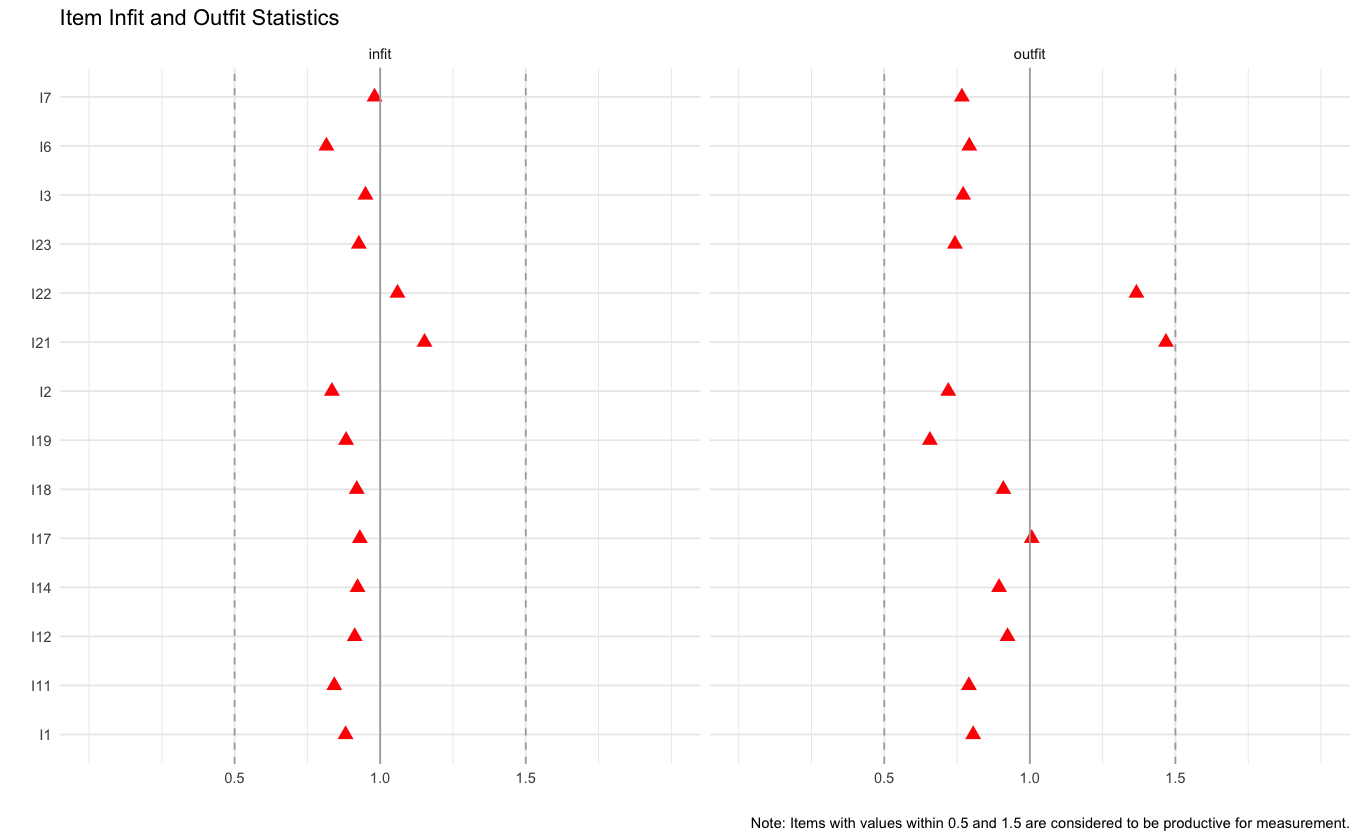

In [41]:
itemfitPlot(mirt_rm)

### Valutare l'Adattamento delle Persone

Possiamo generare le stesse misure di adattamento per ogni persona per valutare quanto bene i pattern di risposta di ciascuno si allineano con il modello. Ragioniamo in questo modo: se una persona con un alto valore di $\theta$ (cioè alta abilità latente) non risponde correttamente a un item facile, questa persona non si adatta bene al modello. Al contrario, se una persona con bassa abilità risponde correttamente a una domanda molto difficile, anche questo non è conforme al modello. Nella pratica, è probabile che ci saranno alcune persone che non si adattano bene al modello. Tuttavia, finché il numero di rispondenti non conformi è basso, la situazione è accettabile. Di solito, ci concentriamo nuovamente sulle statistiche di infit e outfit. Se meno del 5% dei rispondenti presenta valori di infit e outfit superiori o inferiori a 1.96 e -1.96, possiamo considerare il modello adeguato.

Stimiamo gli indici infit e outfit delle persone usando `eRm`:

In [42]:
eRm::personfit(person.parameter(rm_sum0))


Personfit Statistics: 
      Chisq df p-value Outfit MSQ Infit MSQ Outfit t Infit t
1    13.191 13   0.433      0.942     1.080     0.07    0.35
2     7.004 13   0.902      0.500     0.744    -0.44   -0.85
3     7.564 13   0.871      0.540     0.799    -0.37   -0.62
4    13.651 13   0.399      0.975     1.112     0.14    0.44
5     4.024 13   0.991      0.287     0.354    -1.81   -2.20
6    22.049 13   0.055      1.575     1.304     0.96    1.01
7    22.823 13   0.044      1.630     1.623     1.02    1.83
8    12.937 13   0.453      0.924     0.746     0.00   -0.66
9    71.924 13   0.000      5.137     1.376     2.32    1.11
10   22.507 13   0.048      1.608     1.065     1.12    0.30
11    8.244 13   0.827      0.589     0.786    -0.83   -0.52
12   17.925 13   0.160      1.280     0.916     0.67   -0.10
13    5.629 13   0.959      0.402     0.667    -0.33   -1.01
14   18.081 13   0.154      1.291     0.950     0.62   -0.07
15    9.427 13   0.740      0.673     0.890    -0.50   -0.24


Come per le statistiche di infit e outfit per i singoli item, individui con valori di t superiori a 2 mostrano un comportamento di risposta più casuale rispetto a quanto previsto dal modello di Rasch. Questo può indicare, ad esempio, comportamenti di risposta basati su supposizioni o scarsa attenzione. I modelli di risposta che portano a valori di t inferiori a -2 indicano un comportamento di risposta più deterministico rispetto a quello atteso. In questo esempio, le persone identificate con il numero 5 e 43 mostrano questo comportamento.

Otteniamo le stime infit e outfit per le persone con `mirt`:

In [43]:
head(personfit(mirt_rm))

,outfit,z.outfit,infit,z.infit,Zh
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.9312232,0.04185066,1.0902553,0.3722087,-0.1421791
2,0.5102523,-0.64959154,0.7279243,-0.8983287,0.8888458
3,0.5477460,-0.56603982,0.7820722,-0.6817931,0.7512104
4,0.9963324,0.16858181,1.1111285,0.4302049,-0.2315919
5,0.2892823,-1.88738642,0.3522188,-2.2386237,1.6537608
6,1.4647442,0.88480217,1.3150003,1.0095971,-1.0020311


In [44]:
personfit(mirt_rm) %>%
    summarize(
        infit.outside = prop.table(table(z.infit > 1.96 | z.infit < -1.96)),
        outfit.outside = prop.table(table(z.outfit > 1.96 | z.outfit < -1.96))
    ) # lower row = non-fitting people

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns an ungrouped data
  frame and adjust accordingly.”


infit.outside,outfit.outside
<table[1d]>,<table[1d]>
0.9175,0.98
0.0825,0.02


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


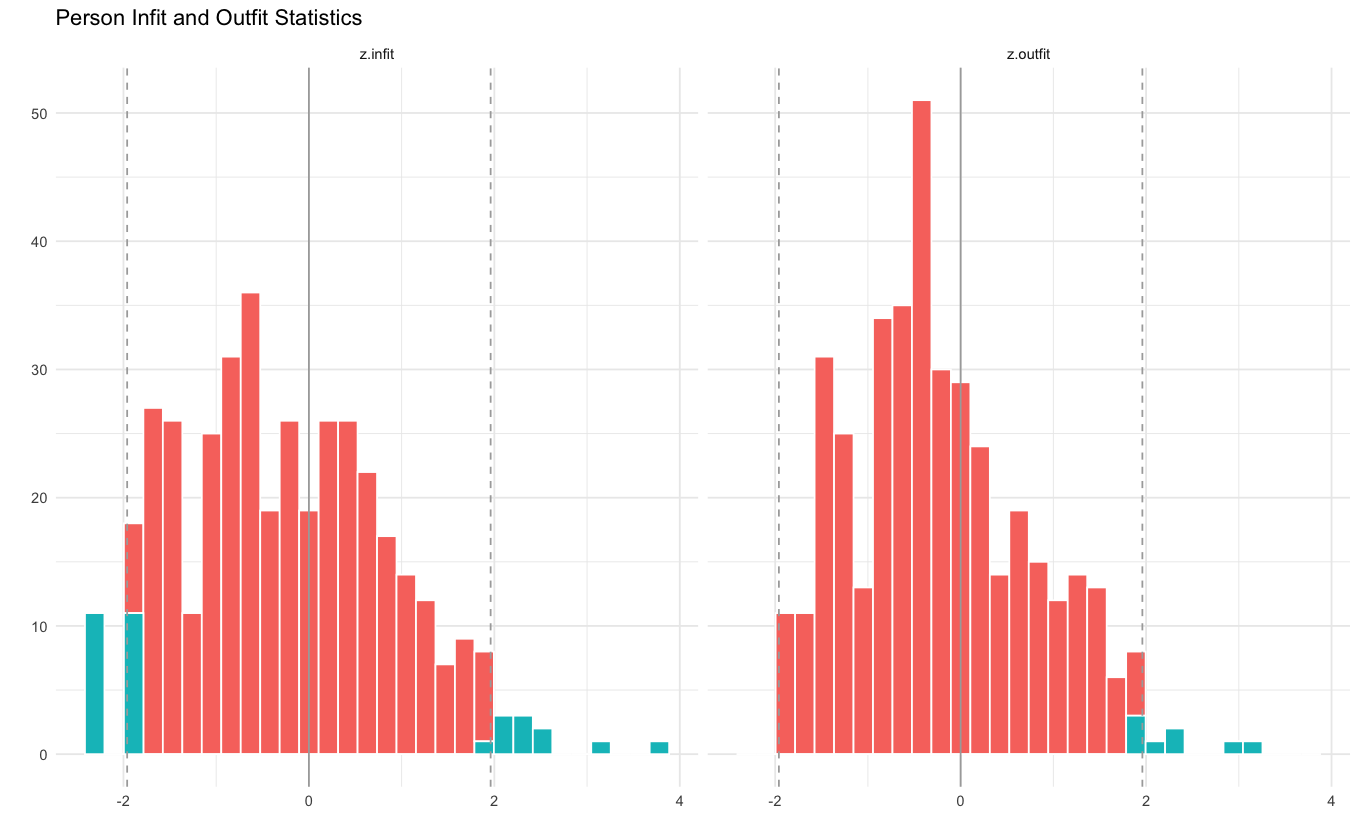

In [45]:
personfitPlot(mirt_rm)

In conclusione, nel caso dei dati in esame, meno del 5% dei rispondenti mostra valori di outfit che eccedono la soglia di 1.96 o che sono inferiori a -1.96. Invece, l'8% dei rispondenti mostra valori di infit che eccedono la soglia di 1.96 o che sono inferiori a -1.96. Questi risultati suggeriscono che il modello di Rasch non è del tutto coerente con i dati esaminati.

### Grafici Specifici IRT

Oltre alla valutazione complessiva dell’adattamento del modello, ci possiamo chiedere quanto bene gli item coprono l’intervallo dell’abilità latente.
A tale domanda si può rispondere creando una “Mappa Item-Persona” (noto anche come Wright Map). Questa visualizzazione inizia tracciando la distribuzione dell’abilità latente nel campione studiato. Successivamente, tracciamo anche la difficoltà di ciascun item sulla stessa scala di theta. Allineando entrambi i grafici, possiamo vedere quanto bene gli item coprono l’abilità latente.

Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


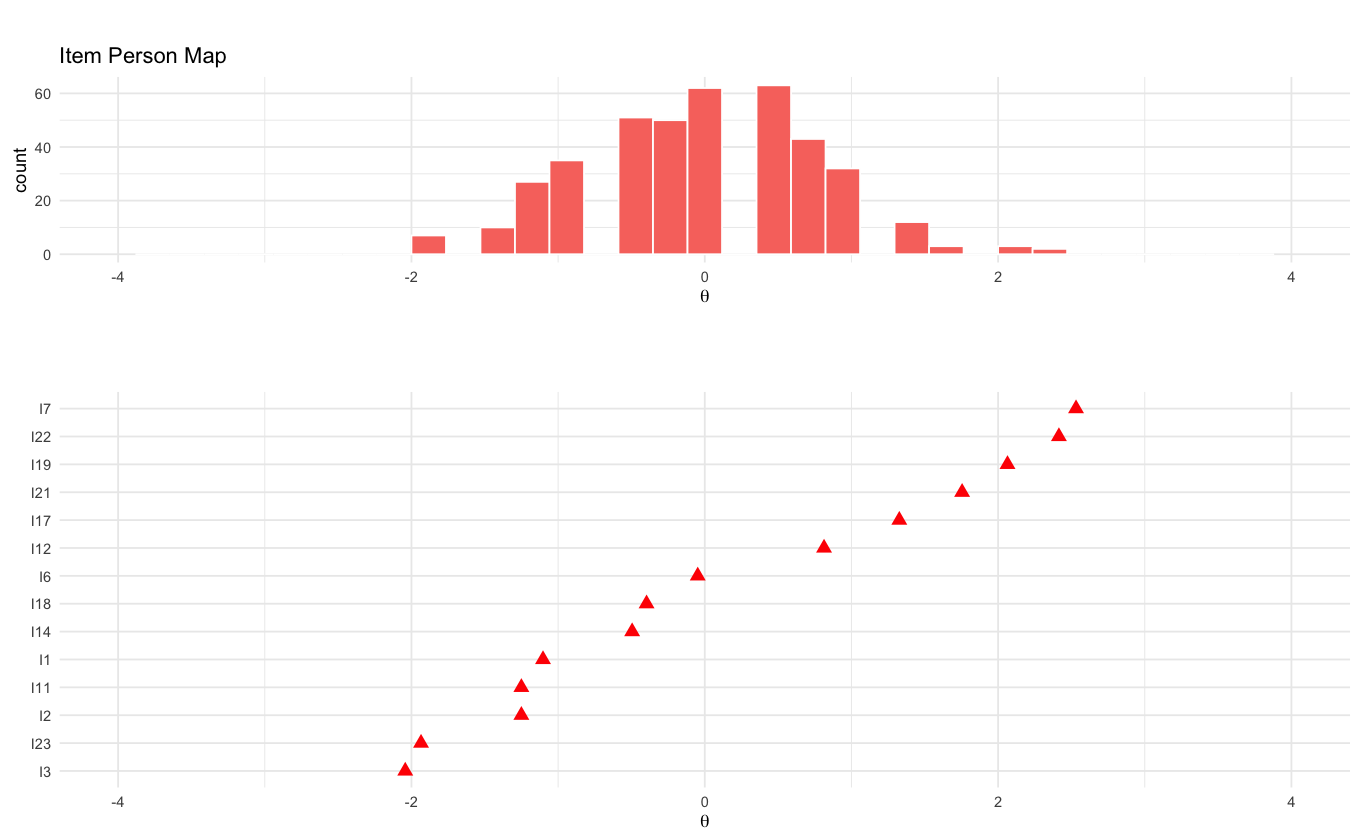

In [46]:
itempersonMap(mirt_rm)

Nel caso presente vediamo che c'è un buon allineamento tra le abilità dei partecipanti e la difficoltà degli item.

## Curva di Informazione dell'Item 

Un altro modo per valutare la qualità di ciascun item è tramite la creazione delle cosiddette curve di informazione degli item. L'informazione è un concetto statistico che si riferisce alla capacità di un item di stimare con precisione i punteggi su theta. L'informazione a livello di item chiarisce quanto bene ogni item contribuisca alla precisione nella stima dei punteggi, con livelli più elevati di informazione che portano a stime dei punteggi più accurate.

Per esempio:
- Un item con un'elevata informazione sarà molto utile per discriminare tra rispondenti con diversi livelli di abilità latente attorno a un certo punto della scala di theta. Questo significa che l'item fornisce dati affidabili e significativi sulla capacità o conoscenza che si sta misurando.
- Al contrario, un item con bassa informazione non aggiunge molto alla precisione della stima del punteggio. Questo potrebbe accadere se l'item è troppo facile o troppo difficile per la maggior parte dei rispondenti, o se non è strettamente correlato al tratto latente che si sta cercando di misurare.

La posizione delle Curve Caratteristiche degli Item (ICC) determina le regioni sul tratto latente dove ciascun item fornisce il massimo di informazione. Questo viene illustrato tramite il grafico dell'informazione dell'item.

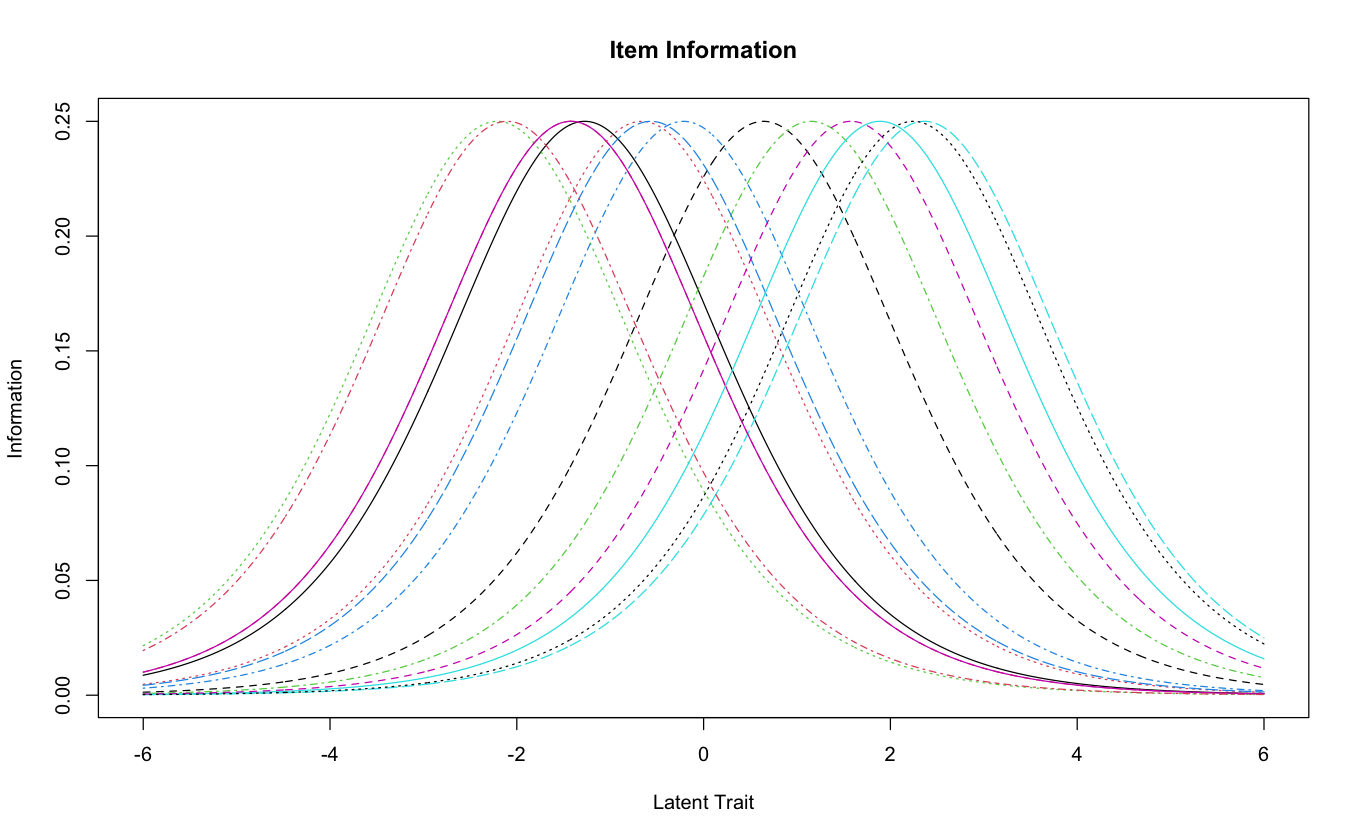

In [47]:
plotINFO(rm_sum0, type = "item", legpos = FALSE)

Qui vediamo che alcuni item forniscono maggiori informazioni sui livelli più bassi di $\theta$, altri a livelli medi di  $\theta$ e altri ancora ai livelli alti di  $\theta$.

### Informazione del Test

Il concetto di “informazione” può essere applicato anche all’intera scala del test. In questo caso, osserviamo che la scala è molto efficace nel stimare i punteggi di theta tra -2 e 3, ma presenta una minore precisione nella stima dei punteggi di theta agli estremi. In altre parole, il test fornisce stime accurate per una vasta gamma di abilità medie e leggermente superiori alla media, ma diventa meno affidabile per valutare abilità molto basse o molto elevate.

Questa osservazione ha importanti implicazioni pratiche:

- **Valutazione Ottimale per la Maggior Parte dei Rispondenti:** La scala è particolarmente adatta per valutare rispondenti il cui livello di abilità si trova all’interno dell’intervallo in cui il test è più informativo (-2 a 4).
- **Limiti nella Valutazione degli Estremi:** Per rispondenti con abilità molto al di sotto di -2 o molto al di sopra di 4, il test potrebbe non fornire stime di abilità così precise. Questo significa che per questi individui, il test potrebbe non essere in grado di discriminare efficacemente tra diversi livelli di abilità.
  
Le curve di informazione del test aiutano a identificare dove il test è più efficace e dove potrebbe aver bisogno di miglioramenti o aggiustamenti, come l’aggiunta di item più difficili o più facili per estendere la sua precisione ai livelli estremi di abilità. Questa analisi consente di ottimizzare il test per una valutazione più accurata su tutta la gamma di abilità latente che si intende misurare.


Il grafico dell'informazione del test può essere generato utilizzando `eRm::plotINFO`:

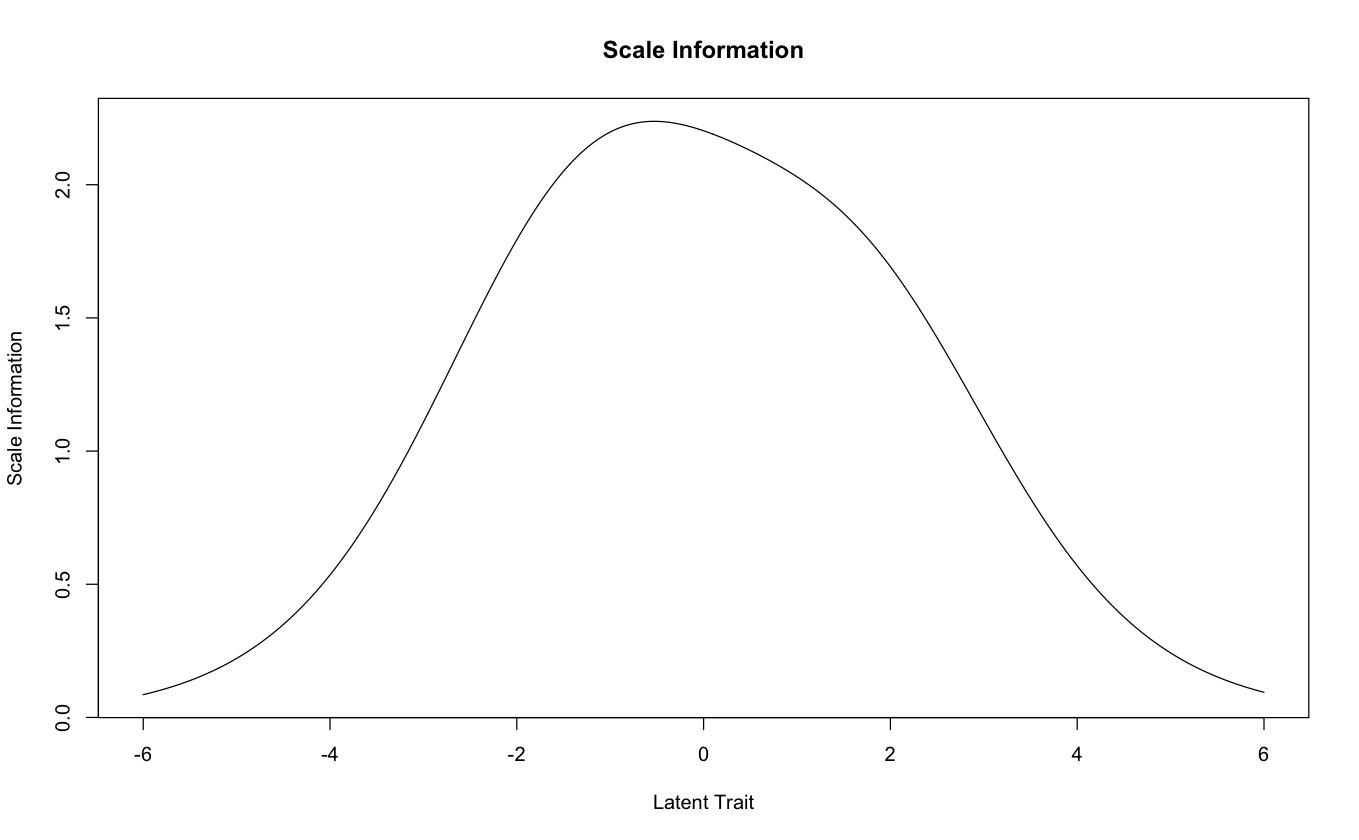

In [48]:
eRm::plotINFO(rm_sum0, type = "test")

Oppure possiamo usare `testInfoPlot()`:

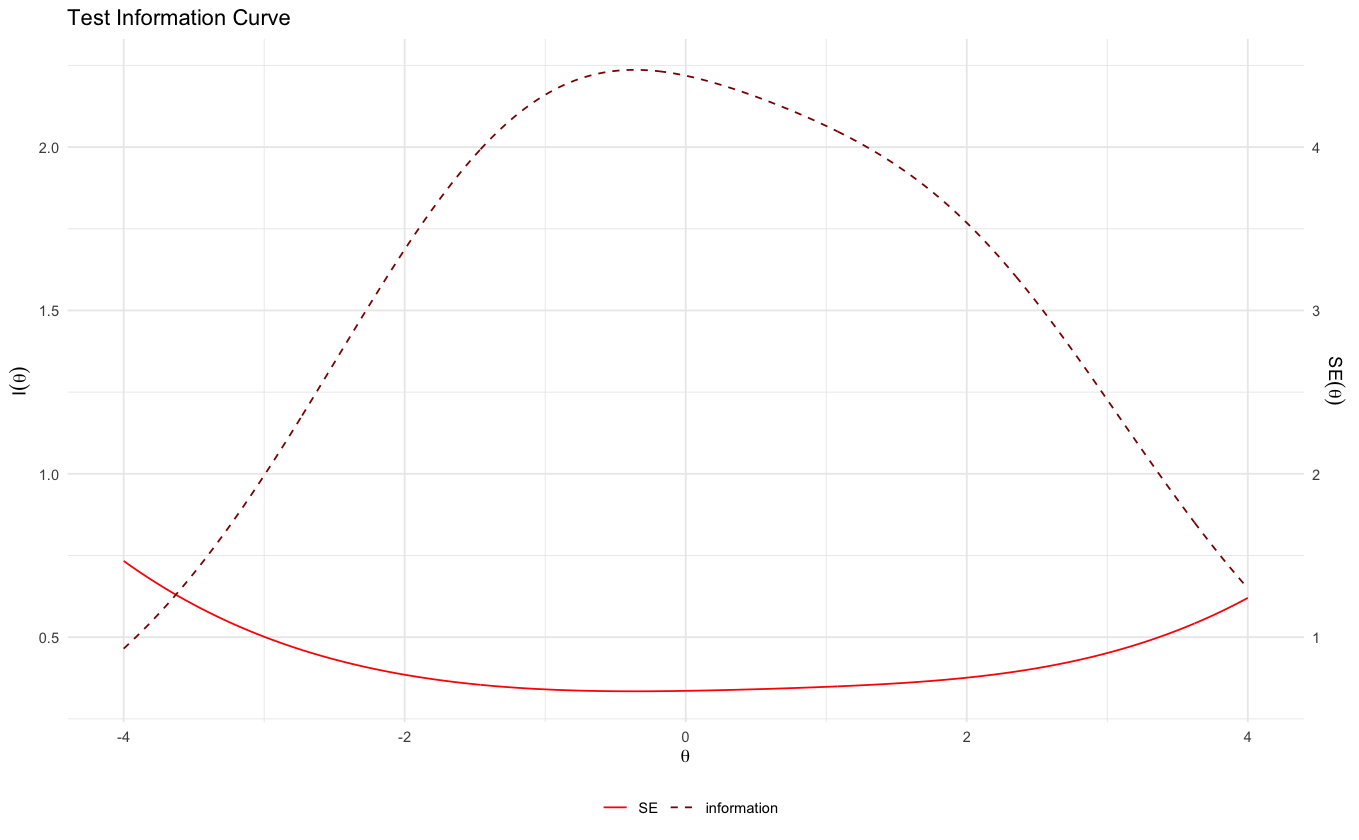

In [49]:
testInfoPlot(mirt_rm, adj_factor = 2)

Come abbiamo già osservato nella mappa persona-item, la maggior parte degli item si trova intorno allo zero. Di conseguenza, l'informazione del test nella figura è maggiore attorno allo zero. Si noti che, di conseguenza, gli errori standard aumentano allontanandosi dallo zero.

### Stima dei Parametri delle Persone

La stima dei parametri delle persone ottenuta con il metodo di massima verosimiglianza si ottiene nel modo seguente:

In [50]:
theta <- eRm::person.parameter(rm_sum0)
theta


Person Parameters:

 Raw Score    Estimate Std.Error
         1 -3.39916338 1.0848195
         2 -2.52177653 0.8317915
         3 -1.91597998 0.7365453
         4 -1.40925895 0.6923920
         5 -0.94517977 0.6731151
         6 -0.49649946 0.6684716
         7 -0.04741155 0.6729635
         8  0.41178325 0.6830616
         9  0.88780188 0.6976852
        10  1.38917320 0.7203115
        11  1.93510328 0.7620315
        12  2.57656206 0.8512968
        13  3.48323588 1.0967898
        14  4.45486143        NA

Da notare che questa tabella non mostra una stima per ogni persona. La stima dell'abilità di una persona dipende unicamente dal numero di item a cui ha risposto correttamente. Questo significa che dobbiamo calcolare una stima dell'abilità per ogni possibile punteggio totale (indicato come "punteggi grezzi" nella tabella) e possiamo assegnare tale stima a ciascuna persona che ottiene quel punteggio. Ad esempio, stimiamo che l'abilità di una persona che risponde correttamente a dieci item sia circa 1.39. 

Vediamo che le stime dell'abilità aumentano con il punteggio grezzo. Questo ha senso, poiché un candidato ha maggiori probabilità di rispondere correttamente a un item se la sua abilità supera la difficoltà di quell'item. Più item vengono risposti correttamente, più è probabile che l'abilità del candidato sia elevata. Inoltre, vediamo che l'errore standard aumenta con la distanza da zero, come era prevedibile dalla mappa persona-item o dalle curve di informazione degli item e del test, dove abbiamo visto che la maggior parte degli item si trova intorno allo zero.

La mancanza di un errore standard per i candidati che rispondono correttamente a tutti i 14 item potrebbe lasciarci perplessi. La ragione di tale mancanza è che non esiste una stima di massima verosimiglianza per questo punteggio perfetto. Per gestire questo, la funzione `person.parameter()` utilizza un metodo chiamato *interpolazione spline* per produrre una stima dell'abilità, ma la procedura non fornisce stime dell'errore. Lo stesso sarebbe vero per i candidati che risolvono correttamente 0 item, ma in questo campione non si è verificato un punteggio di zero.

Possiamo ottenere informazioni sulle stime dell'abilità dei singoli candidati utilizzando la funzione `summary()`, cioè,

In [51]:
summary(theta)


Estimation of Ability Parameters

Collapsed log-likelihood: -76.27866 
Number of iterations: 10 
Number of parameters: 13 

ML estimated ability parameters (without spline interpolated values): 
             Estimate Std. Err.       2.5 %      97.5 %
theta 1   -0.49649946 0.6684716 -1.80667980  0.81368089
theta 2   -1.40925895 0.6923920 -2.76632227 -0.05219563
theta 3   -1.40925895 0.6923920 -2.76632227 -0.05219563
theta 4   -0.49649946 0.6684716 -1.80667980  0.81368089
theta 5    0.41178325 0.6830616 -0.92699284  1.75055934
theta 6   -0.94517977 0.6731151 -2.26446118  0.37410164
theta 7   -0.94517977 0.6731151 -2.26446118  0.37410164
theta 8   -0.04741155 0.6729635 -1.36639576  1.27157265
theta 9   -1.91597998 0.7365453 -3.35958233 -0.47237764
theta 10  -0.49649946 0.6684716 -1.80667980  0.81368089
theta 11  -0.04741155 0.6729635 -1.36639576  1.27157265
theta 12   0.41178325 0.6830616 -0.92699284  1.75055934
theta 13  -1.91597998 0.7365453 -3.35958233 -0.47237764
theta 14  -0.9451797

L'output – che qui abbiamo di nuovo troncato per risparmiare spazio – contiene stime ed errori standard, insieme ai limiti inferiori (2.5%) e superiori (97.5%) degli intervalli di confidenza al 95%, per tutti i candidati che hanno risposto correttamente fino a 13 item. I candidati che hanno risposto correttamente a tutti i 14 item (o a nessun item) sono omessi da questo output. Possiamo anche notare che alcuni candidati, ad esempio il secondo e il terzo, ricevono esattamente la stessa stima di abilità ed errore standard. Questo è dovuto al fatto che hanno lavorato sullo stesso set di item e hanno ottenuto lo stesso punteggio totale. In alternativa, possiamo utilizzare il comando `coef(theta)` per ottenere solo la stima dell'abilità per ciascun candidato.

Possiamo anche stimare l'abilità dei candidati utilizzando la funzione `mirt::fscores()`. Per i modelli unidimensionali, gli argomenti più importanti di `fscores()` sono `object` e `method`. L'argomento `object` accetta il risultato della funzione `mirt()`. L'argomento `method` indica quale metodo utilizzare per stimare i parametri della persona. Per impostazione predefinita, `method="EAP"`, il che indica che il parametro della persona dovrebbe essere stimato utilizzando il metodo *expected a posteriori* (EAP). Possiamo calcolare le stime EAP per il modello di Rasch e stampare le sue prime sei voci inserendo:

In [52]:
theta_eap <- fscores(mirt_rm)
head(theta_eap)

F1
-0.2177416
-0.8276435
-0.8276435
-0.2177416
0.3913603
-0.5213117


Per impostazione predefinita mirt mostra solo le stime puntuali, ma è possibile aggiungere gli errori standard tramite l'opzione `full.scores.SE = TRUE` alla funzione `fscores()`. Gli errori standard dovrebbero essere esaminati prima di interpretare o riportare le stime dei parametri della persona.

La funzione `fscores()` fornisce anche stimatori di massima verosimiglianza (ML), massimo a posteriori (MAP) e likelihood ponderata (WLE). Ora confrontiamo i quattro tipi di stime dei parametri della persona fornite da `mirt`. Gli stimatori ML, MAP e WLE possono essere calcolati inserendo

In [53]:
theta_ml <- fscores(mirt_rm, method = "ML", max_theta = 30)
theta_map <- fscores(mirt_rm, method = "MAP")
theta_wle <- fscores(mirt_rm, method = "WLE")

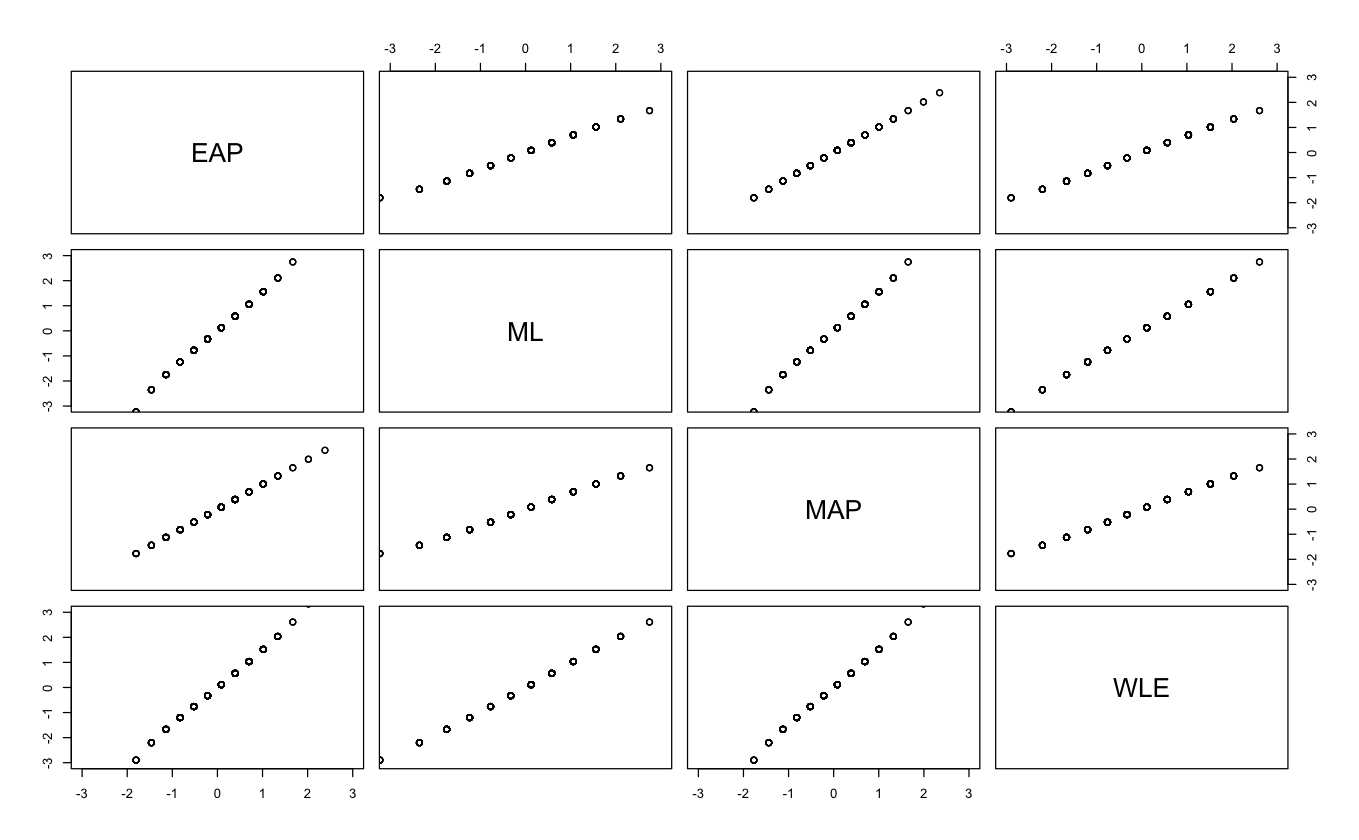

In [54]:
ests <- cbind(theta_eap, theta_ml, theta_map, theta_wle)
colnames(ests) <- c("EAP", "ML", "MAP", "WLE")
pairs(ests, xlim = c(-3, 3), ylim = c(-3, 3))

### Affidabilità Condizionale

Il concetto di affidabilità varia tra la CTT e la IRT. Nell'IRT, possiamo calcolare l'affidabilità condizionale, ossia l'affidabilità della scala a diversi livelli di theta. 

- Nella **CTT**, l'affidabilità è solitamente considerata come una proprietà fissa del test, indipendentemente dal livello di abilità dei rispondenti. Si misura spesso attraverso il coefficiente alfa di Cronbach o metodi simili.
- Nell'**IRT**, invece, l'affidabilità è vista come una proprietà variabile che dipende dal livello di theta del rispondente. A diversi livelli di theta, la precisione con cui il test misura l'abilità può variare significativamente.
  
L'affidabilità condizionale fornisce una misura più specifica e dettagliata di quanto affidabilmente un test misura l'abilità a diversi livelli di $\theta$. 

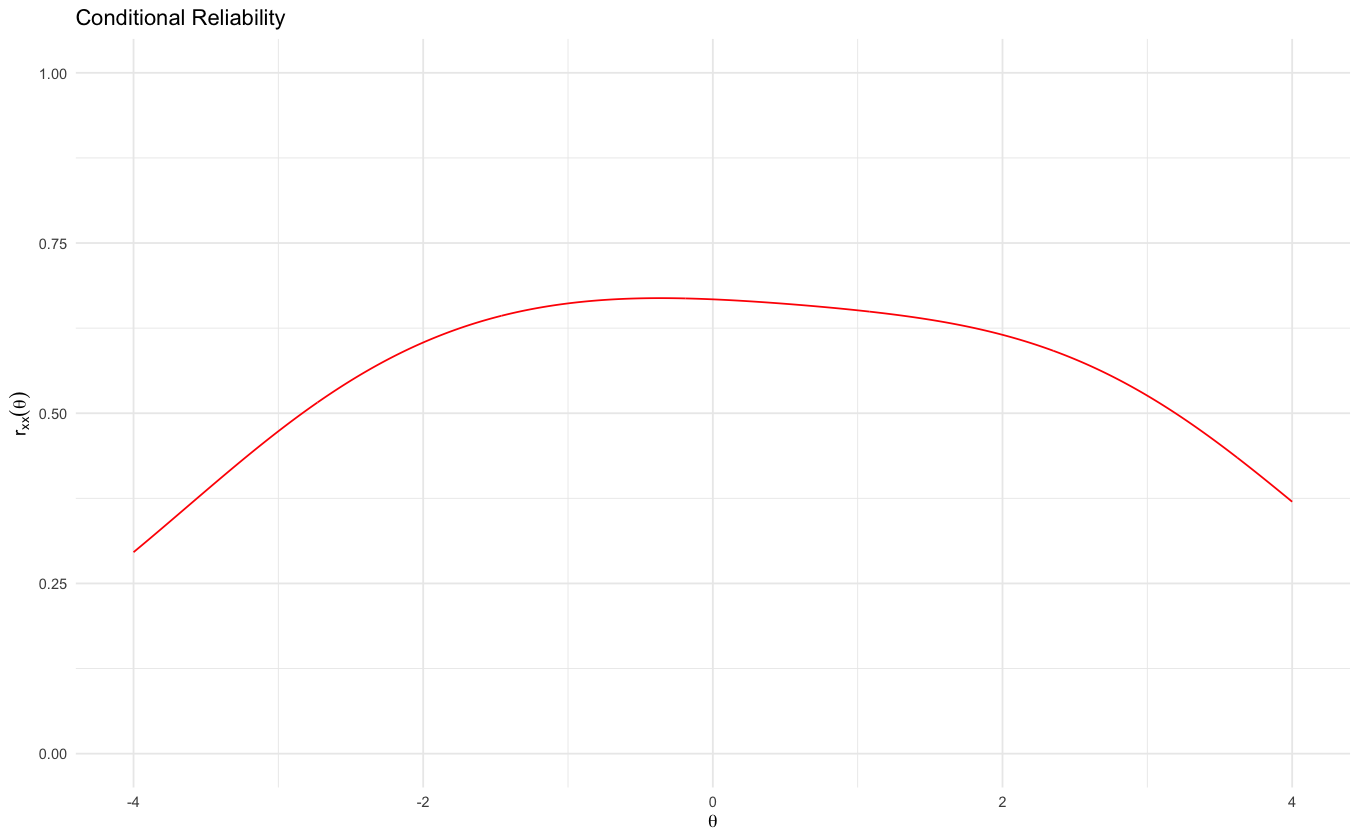

In [55]:
conRelPlot(mirt_rm)

Nel caso presente, 
- a livelli medi di $\theta$: Il test mostra una buona affidabilità, indicando che è in grado di distinguere con precisione tra rispondenti con abilità medie.
- agli estremi di $\theta$: Il test mostra un'affidabilità più bassa, suggerendo che non è altrettanto efficace nel distinguere tra livelli di abilità molto alti o molto bassi.

In sostanza, l'affidabilità condizionale nell'IRT ci fornisce una comprensione più dettagliata di dove il test funziona bene e dove potrebbe richiedere miglioramenti per valutare con precisione l'abilità su tutta la gamma di theta.

È comunque possibile calcolare un singolo valore di attendibilità:

In [56]:
marginal_rxx(mirt_rm)

[1] 0.6765296

### Curve Caratteristiche del Test

Una proprietà aggiuntiva di un modello IRT è che il punteggio complessivo delle risposte corrette (la somma dei punteggi per le risposte corrette) risulta essere una stima efficace del tratto latente sottostante. Un grafico delle cosiddette curve caratteristiche della scala permette di valutare visivamente questo aspetto tracciando la relazione tra theta e il punteggio di risposte corrette.

- Questo tipo di grafico mostra come il punteggio totale delle risposte corrette si correla con il livello di abilità latente (theta) stimato dal modello IRT.
- Ad esempio, se la curva mostra che punteggi più alti di risposte corrette corrispondono sistematicamente a livelli più alti di theta e viceversa, ciò indica che il punteggio totale è un buon indicatore del tratto latente.
- Al contrario, se la curva non mostra una relazione chiara o lineare tra punteggio totale e theta, ciò potrebbe suggerire che il punteggio totale non cattura completamente la complessità o le sfumature del tratto latente.

In sintesi, le curve caratteristiche della scala forniscono una rappresentazione visiva di come il punteggio totale di risposte corrette rifletta l'abilità latente misurata dal test, offrendo una visione utile per valutare l'efficacia del punteggio totale come indicatore del tratto latente in questione.

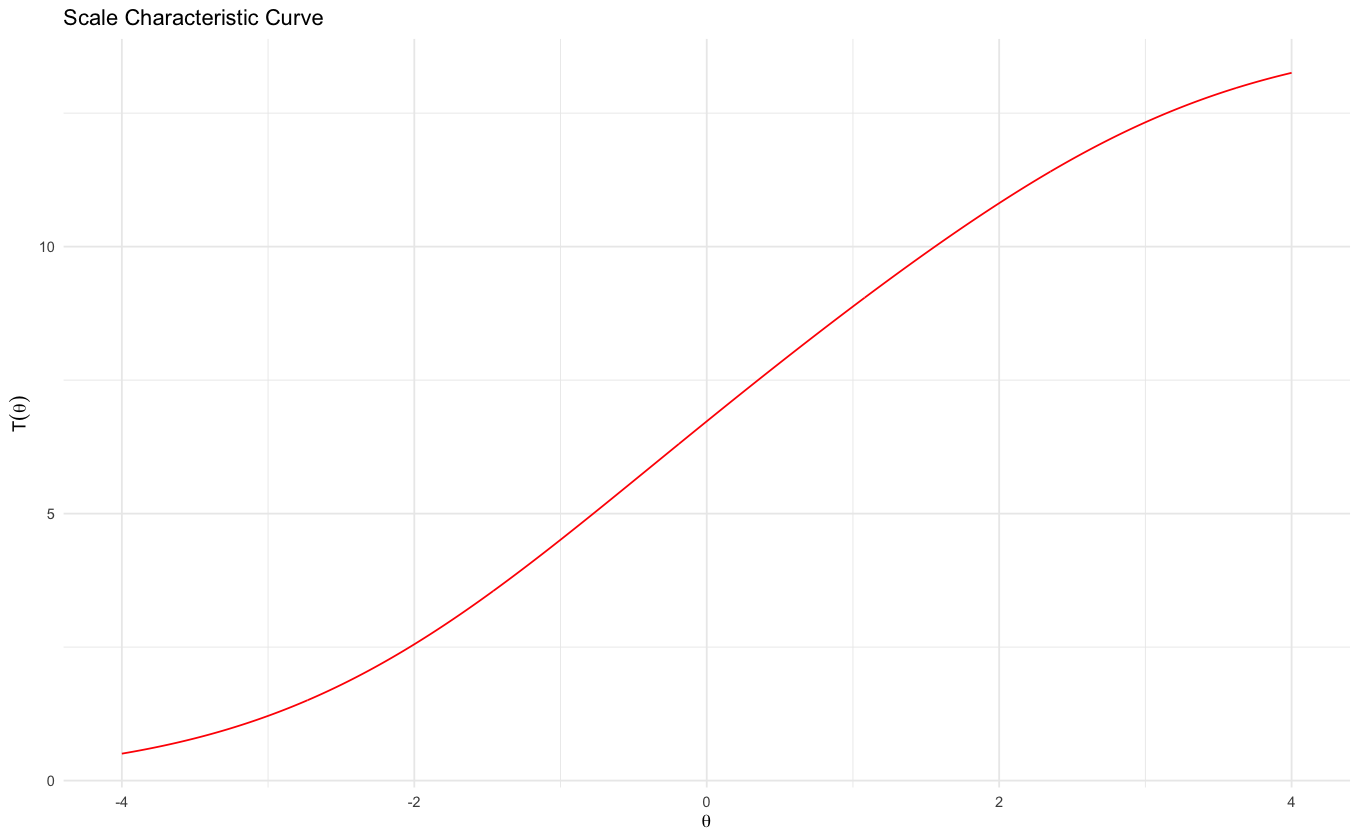

In [57]:
scaleCharPlot(mirt_rm)

Questa curva di solito assume la forma di una S, poiché la relazione è più forte nel range medio di theta e meno precisa agli estremi (come già visto nella curva di informazione del test). 

Possiamo ovviamente testare anche questo con una semplice correlazione. Per prima cosa, estraiamo il punteggio latente IRT utilizzando la funzione `fscores()`. Quindi lo correliamo con il punteggio di risposte corrette.

In [58]:
score <- fscores(mirt_rm)
sumscore <- rowSums(responses)
cor.test(score, sumscore)


	Pearson's product-moment correlation

data:  score and sumscore
t = 1097.1, df = 398, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9997988 0.9998642
sample estimates:
      cor 
0.9998347 


Nel caso presente, la correlazione è quasi perfetta.

## Considerazioni Conclusive

Tradizionalmente, il punteggio totale ottenuto in un test psicologico è stato considerato come la misura più efficace dell'abilità o della predisposizione di una persona rispetto a un certo tratto di personalità. Tuttavia, la dipendenza del punteggio totale dalla difficoltà degli item presenta limitazioni significative. Ad esempio, due persone possono ottenere lo stesso punteggio totale rispondendo in modo diverso a item di varia difficoltà, il che non riflette accuratamente le loro abilità reali.

Nella Teoria Classica dei Test (CTT), l'enfasi è posta sul punteggio totale, ma questa prospettiva ignora le variazioni nella difficoltà degli item e assume che gli errori di misurazione si annullino reciprocamente attraverso la procedura di sommazione. Tuttavia, la CTT è limitata dalla sua assunzione di varianze di errore uniformi per tutti i rispondenti, dall'aspettativa di errori di misurazione nulli e dalla focalizzazione esclusiva sui punteggi totali, senza considerare l'adattamento di item e persone.

Al contrario, la Teoria della Risposta all'Item (IRT) cambia il focus dai punteggi totali alle risposte a ciascun item, sfruttando le caratteristiche degli item. L'IRT descrive come attributi come abilità, atteggiamento o personalità, insieme alle caratteristiche degli item, influenzino la probabilità di fornire una risposta. Il Modello di Rasch, una forma semplice di IRT per risposte binarie, stabilisce una relazione diretta tra la probabilità di una risposta corretta e il livello di abilità del rispondente.

La stima dell'abilità in IRT non dipende dagli specifici item somministrati, permettendo di confrontare i risultati tra gruppi diversi con lo stesso set di item. Inoltre, la qualità degli item è valutata indipendentemente dal campione di rispondenti, rendendo le proprietà degli item costanti tra diversi gruppi con varie abilità.

L'IRT supera i limiti della CTT stimando congiuntamente le proprietà degli item e il livello di abilità dei rispondenti. Le caratteristiche degli item diventano indipendenti dal campione di individui utilizzato per costruire il test, permettendo la creazione di insiemi di item equivalenti per misurare abilità latenti. Questo approccio offre maggiore precisione e affidabilità nelle misurazioni, assicurando la comparabilità tra diversi gruppi di individui. In conclusione, l'IRT rappresenta un metodo statistico avanzato e versatile per una valutazione più accurata e affidabile di tratti e abilità in contesti psicometrici.